Primeiramente importamos uns módulos útiles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import special
from mpl_toolkits.mplot3d import Axes3D
import time as time
from matplotlib import path
from matplotlib.path import Path
from tqdm import tqdm
import matlab.engine
import os as os

t0 = time.perf_counter()

Inicializamos parámetros básicos.

In [2]:
boundary = 'RECTANGLE_1:4'
a = 10

max_in_sum_1 = 50 # Puntos para cada orde.
max_in_sum_2 = 50 # Ordes de F_n.

M = 1
N = 1

spacing_subarray = 0.5
spacing_dipoles = 0.5

Decidimos se calculamos as táboas.

In [3]:
Table_F = True
Table_K = True

Element = True
Subarray = True

Definimos unha función para determinar puntos dentro e fóra da máscara e o seu raio.

In [4]:
def pass_to_dB(function):
    return 10 * np.log10(function / np.max(function))

def clear_around(function, limit):
    function[np.where(function < limit)] = limit
    #function[out_arg] = limit

def degrees(angle):
    return 180 * angle / np.pi

def radians(angle):
    return np.pi * angle / 180

def _ancho_(phi_rad_0):
    theta = 0
    
    for i in np.arange(1, 5): # Calculamos o ancho exacto a -0.50 dB.
        step = 10 / 8**i
        temp = 1
        
        while temp > 0:
            theta += step
            u = np.sin(radians(theta)) * np.cos(phi_rad_0)
            v = np.sin(radians(theta)) * np.sin(phi_rad_0)
            temp = mask_path.contains_point((u, v)) * 1 # 1 se o contén, 0 se non.
        
        theta -= step
    return np.sin(radians(theta))

def track_radio_mask(radio_0, sin_theta_0, mask, phi_rad):
    sin_theta_vector = np.zeros(len(phi_rad))
    
    for i in range(len(phi_rad)):
        sin_theta_vector[i] = _ancho_(phi_rad[i])
    
    return radio_0 * sin_theta_0 / sin_theta_vector

Procedemos ao cálculos coa máscara.

In [5]:
mask = np.loadtxt('Masks/mask_boundary_'+ boundary + '.dat')
mask_path = Path((mask))

radio_0 = 50 # Radio de 50 lambda.
sin_theta_0 = 0.04273

phi_deg = np.arange(-180, 180 + 0.1, 0.1)
phi_rad = np.pi * phi_deg / 180
radio_vector = track_radio_mask(radio_0, sin_theta_0, mask, phi_rad) # Creamos o vector radio.

Gardamos o raio vector para acceder a el dende Matlab.

In [6]:
np.savetxt('Temporal_radial_vector.txt', np.column_stack(radio_vector) / radio_0)

## Zeros de Bessel

In [7]:
rows = 2 * max_in_sum_2 + 1
columns = max_in_sum_1 + 1

Bessel_zeros = np.zeros((max_in_sum_2 + 1, columns))

for k in range(max_in_sum_2 + 1):
    Bessel_zeros[k, 1:max_in_sum_1 + 1] = sc.special.jn_zeros(k, max_in_sum_1) / np.pi

## Táboas de $F_n(p)$

$F_n$ é o que se calcula en Matlab.

In [8]:
if Table_F:
    eng = matlab.engine.start_matlab()    
    F_k_loaded = np.zeros((rows, columns), dtype = 'complex')
    
    for k in tqdm(np.arange(- max_in_sum_2, max_in_sum_2 + 1)):        
        if k == 0:
            gamma_nm = Bessel_zeros[1, :]
        else:
            gamma_nm = Bessel_zeros[np.abs(k), :]
        
        for zero in range(columns):
            if gamma_nm[zero] in Bessel_zeros[1, :]:
                gamma_nm[zero] += 1e-5 # Cambiei esto de -15 a -5.
            
            try:
                F_k_loaded[k + max_in_sum_2, zero] = eng.Integral(float(gamma_nm[zero]), float(k)) # Función de Matlab.
            except:
                eng.quit()
                eng = matlab.engine.start_matlab()
                F_k_loaded[k + max_in_sum_2, zero] = eng.Integral(float(gamma_nm[zero]), float(k)) # Función de Matlab.
            
    np.savetxt('Results/Tables/Table_F_n_' + boundary + '.txt', F_k_loaded)
    eng.quit()

else:
    F_k_loaded = np.loadtxt('Results/Tables/Table_F_n_' + boundary + '.txt', dtype = 'complex')

  0%|                                                   | 0/101 [00:00<?, ?it/s]


valor =

   1.7940e-14 + 1.5500e-15i


valor =

  -1.1172e-04 - 4.4374e-06i


valor =

  -3.8292e-05 - 1.7655e-06i


valor =

   1.0934e-04 - 1.3693e-06i


valor =

  -1.1183e-04 - 8.0392e-07i


valor =

   4.5816e-06 - 3.4621e-06i


valor =

   2.1554e-05 + 5.8731e-06i


valor =

   8.0320e-07 + 7.1802e-06i


valor =

  -2.5704e-05 - 2.6340e-07i


valor =

   4.4694e-05 - 9.6553e-06i


valor =

  -2.5476e-06 - 1.3040e-05i


valor =

   3.6283e-05 - 1.1263e-05i


valor =

  -3.7292e-05 - 2.3104e-05i


valor =

  -3.4234e-05 + 4.2681e-05i


valor =

  -8.0962e-05 - 2.5124e-05i


valor =

   5.0191e-05 + 4.1805e-06i


valor =

  -4.2118e-05 + 1.2806e-05i


valor =

  -1.7820e-04 + 1.6645e-07i


valor =

   9.2633e-05 - 2.6983e-05i


valor =

  -9.8831e-06 + 1.6414e-05i


valor =

   1.3392e-05 + 3.7057e-06i


valor =

  -6.2524e-05 - 1.5252e-07i


valor =

  -1.4643e-05 + 1.2040e-05i


valor =

  -3.6801e-05 + 7.7221e-06i


valor =

   9.6338e-05 + 5.4335e-06i


valor =

  -2.7478e-05 +

  1%|▍                                          | 1/101 [00:06<10:28,  6.28s/it]


valor =

  -9.5706e-05 + 9.2803e-07i


valor =

   3.4600e-05 + 2.7087e-06i


valor =

   1.1104e-04 - 5.5246e-06i


valor =

  -2.0476e-04 + 4.1647e-06i


valor =

   1.0944e-04 + 1.9481e-07i


valor =

   1.8269e-12 - 3.8202e-15i


valor =

  -1.6498e-05 - 2.8860e-06i


valor =

  -4.3956e-06 - 4.9624e-06i


valor =

  -1.6038e-05 + 4.4531e-06i


valor =

   1.2662e-05 - 5.9661e-06i


valor =

  -8.4540e-06 - 3.1626e-06i


valor =

   2.9896e-06 - 2.7677e-06i


valor =

  -5.7487e-06 + 1.2849e-06i


valor =

   2.8922e-06 + 5.7805e-07i


valor =

  -2.7232e-06 - 2.3681e-06i


valor =

  -1.5930e-05 + 5.1568e-06i


valor =

  -6.5968e-05 + 6.7549e-06i


valor =

   5.2033e-05 + 3.4990e-05i


valor =

  -1.4449e-05 + 5.4740e-05i


valor =

   1.4908e-07 - 2.5180e-06i


valor =

   2.0538e-05 - 1.3871e-05i


valor =

   1.7044e-05 + 2.2984e-06i


valor =

   3.5832e-06 - 8.8033e-07i


valor =

   5.0254e-06 - 4.7233e-06i


valor =

   1.1737e-05 + 5.5328e-06i


valor =

   2.2961e-05 -

  2%|▊                                          | 2/101 [00:08<06:07,  3.71s/it]


valor =

   6.4896e-06 + 2.4976e-05i


valor =

   3.0945e-05 + 1.9569e-06i


valor =

  -9.0878e-05 - 3.8745e-07i


valor =

  -1.7627e-05 + 1.6504e-06i


valor =

   2.1786e-06 + 2.2978e-06i


valor =

   1.2273e-06 + 1.9996e-06i


valor =

   1.0544e-05 + 3.1729e-07i


valor =

  -2.4836e-05 + 8.3785e-06i


valor =

  -3.9700e-05 - 4.9299e-06i


valor =

   2.3428e-05 + 3.3315e-06i


valor =

  -3.0468e-05 + 8.4047e-07i


valor =

   1.0053e-05 - 8.5596e-06i


valor =

   1.0718e-05 + 1.0394e-05i


valor =

  -1.4438e-12 + 3.8280e-15i


valor =

   1.2877e-04 + 6.3423e-06i


valor =

  -1.6104e-04 + 5.3589e-06i


valor =

   8.5514e-05 + 3.7745e-08i


valor =

   2.2138e-06 + 9.9526e-07i


valor =

   4.8633e-05 - 2.6238e-06i


valor =

  -7.2920e-06 - 2.9851e-06i


valor =

  -6.7360e-05 + 2.7724e-06i


valor =

   7.7239e-05 - 8.4087e-07i


valor =

  -7.6678e-05 + 1.4978e-06i


valor =

   3.4859e-05 + 7.1809e-07i


valor =

   3.5679e-05 + 1.2651e-06i


valor =

  -4.0525e-05 +

  3%|█▎                                         | 3/101 [00:09<03:59,  2.44s/it]


valor =

  -7.8543e-05 - 6.3097e-07i


valor =

   1.2368e-04 - 1.6867e-06i


valor =

  -6.9369e-05 + 5.3852e-06i


valor =

  -2.4798e-05 - 1.0693e-05i


valor =

  -1.7075e-05 + 8.7656e-06i


valor =

   5.0292e-05 - 1.3016e-05i


valor =

  -1.4702e-04 + 2.0778e-06i


valor =

   1.1406e-12 - 3.8542e-16i


valor =

   1.3447e-05 - 2.2215e-06i


valor =

  -4.7215e-05 + 4.4619e-06i


valor =

  -1.7441e-05 - 1.0472e-06i


valor =

   5.7764e-06 - 2.7301e-06i


valor =

  -2.6675e-05 + 1.1557e-06i


valor =

   9.2714e-06 + 2.2634e-06i


valor =

  -2.7224e-06 - 2.9744e-06i


valor =

  -1.0113e-05 + 1.7398e-06i


valor =

  -6.3261e-06 + 1.3920e-05i


valor =

   9.6466e-06 - 3.9587e-05i


valor =

  -2.8783e-05 - 3.6347e-06i


valor =

   1.8831e-05 + 1.8127e-05i


valor =

   2.5457e-05 - 6.0584e-07i


valor =

  -9.0349e-06 - 4.3662e-06i


valor =

   8.9101e-06 - 6.2043e-06i


valor =

  -2.1048e-05 + 1.9969e-06i


valor =

  -5.1714e-05 - 4.7357e-07i


valor =

   7.7464e-05 +

  4%|█▋                                         | 4/101 [00:10<02:59,  1.85s/it]


valor =

  -3.7448e-05 + 5.5695e-06i


valor =

  -6.1085e-05 - 1.5408e-05i


valor =

   3.9165e-05 + 4.2501e-06i


valor =

  -7.8316e-05 + 2.7768e-06i


valor =

  -9.0470e-05 - 5.1772e-06i


valor =

   7.3336e-05 - 8.4333e-06i


valor =

   6.7044e-05 - 5.0036e-06i


valor =

  -2.2260e-05 - 5.8156e-06i


valor =

   9.5766e-05 - 5.1229e-06i


valor =

   1.3882e-05 - 2.8617e-06i


valor =

  -8.3334e-05 - 1.5929e-06i


valor =

   6.9437e-05 - 1.1229e-05i


valor =

  -3.7301e-05 + 8.9191e-06i


valor =

   1.7659e-05 - 2.0632e-05i


valor =

  -8.6039e-13 - 3.0033e-15i


valor =

  -4.2586e-04 + 5.9639e-06i


valor =

   2.9447e-04 + 2.3287e-06i


valor =

  -1.2974e-04 + 1.2132e-05i


valor =

   1.3279e-04 + 1.0956e-08i


valor =

  -2.2575e-04 + 4.2689e-06i


valor =

   1.9377e-04 - 2.1819e-08i


valor =

  -1.2670e-04 + 2.8914e-06i


valor =

  -3.2190e-05 - 3.5935e-05i


valor =

   1.1196e-04 - 4.7653e-07i


valor =

  -1.5554e-04 + 2.5819e-06i


valor =

   8.3007e-05 -

  5%|██▏                                        | 5/101 [00:11<02:53,  1.80s/it]


valor =

   1.1203e-05 - 1.0550e-05i


valor =

   1.0382e-05 + 5.5336e-07i


valor =

  -2.7688e-05 - 3.6706e-06i


valor =

   6.5306e-13 + 4.6759e-15i


valor =

  -6.8240e-06 - 1.1209e-06i


valor =

  -6.9924e-06 - 1.0508e-05i


valor =

   2.1566e-06 - 7.8043e-06i


valor =

   6.3567e-06 + 5.5314e-06i


valor =

  -1.1262e-05 - 2.4783e-06i


valor =

   3.9613e-05 + 4.2829e-06i


valor =

  -6.1412e-06 + 2.3671e-06i


valor =

   8.7021e-06 + 3.8464e-05i


valor =

   3.5733e-06 + 4.3577e-06i


valor =

  -4.2641e-05 - 1.3501e-07i


valor =

   5.5567e-06 - 5.0521e-06i


valor =

  -1.8203e-05 + 1.3332e-05i


valor =

  -9.0732e-05 + 1.5087e-06i


valor =

   4.7166e-07 - 2.1738e-06i


valor =

  -6.2611e-05 + 3.7165e-06i


valor =

   1.1821e-05 - 5.3385e-06i


valor =

  -6.2681e-06 - 1.3339e-05i


valor =

  -1.0040e-04 - 4.8597e-06i


valor =

   1.1591e-05 - 6.3747e-06i


valor =

   2.6520e-04 - 1.3413e-05i


valor =

   1.3564e-05 + 1.9745e-05i


valor =

  -5.1188e-06 -

  6%|██▌                                        | 6/101 [00:12<02:25,  1.54s/it]


valor =

  -3.8271e-05 + 6.5400e-06i


valor =

   5.3461e-05 - 1.3433e-05i


valor =

  -7.6749e-05 + 9.5800e-06i


valor =

  -4.9538e-13 - 2.5652e-15i


valor =

  -1.7250e-04 - 2.3227e-06i


valor =

   1.5522e-04 - 2.4318e-06i


valor =

  -2.9453e-04 + 5.7942e-08i


valor =

   1.9956e-04 - 9.1714e-06i


valor =

   2.1746e-05 + 3.1969e-07i


valor =

  -1.6736e-04 - 3.2218e-06i


valor =

   2.3308e-04 + 7.0746e-06i


valor =

  -2.1086e-04 + 4.3645e-06i


valor =

   1.1869e-04 - 4.4021e-07i


valor =

   9.4993e-06 - 2.5933e-06i


valor =

  -1.0785e-04 - 2.2082e-06i


valor =

   1.0930e-04 - 9.4946e-06i


valor =

  -1.5076e-04 + 7.8228e-06i


valor =

  -7.2866e-05 + 1.4525e-06i


valor =

   1.7292e-04 - 6.1906e-06i


valor =

  -1.4955e-04 + 9.1554e-06i


valor =

  -1.5861e-05 + 1.3176e-05i


valor =

  -1.7673e-05 + 5.4109e-06i


valor =

  -7.1294e-05 + 3.7190e-06i


valor =

  -3.9999e-05 + 6.6037e-06i


valor =

   1.0110e-04 - 1.5321e-05i


valor =

  -7.0544e-05 +

  7%|██▉                                        | 7/101 [00:13<02:00,  1.28s/it]


valor =

  -2.2768e-05 + 3.3210e-06i


valor =

   1.8800e-04 + 4.5055e-06i


valor =

  -2.2514e-05 + 1.0861e-06i


valor =

  -1.1587e-04 - 8.7417e-06i


valor =

   4.2839e-05 + 5.8889e-07i


valor =

  -3.7452e-05 - 5.3087e-06i


valor =

  -1.3906e-04 + 4.0648e-06i


valor =

  -1.5946e-05 - 8.4851e-06i


valor =

  -1.0154e-04 + 1.1842e-06i


valor =

   8.0311e-05 + 3.2810e-06i


valor =

   9.1152e-06 + 6.5447e-07i


valor =

  -5.1577e-05 - 3.9853e-06i


valor =

   1.9064e-05 + 3.1468e-06i


valor =

   5.2179e-05 - 7.5799e-06i


valor =

   3.5228e-13 - 1.4940e-15i


valor =

  -7.8141e-06 + 1.7611e-06i


valor =

  -1.7455e-05 - 5.5391e-06i


valor =

  -4.0839e-07 + 4.1085e-06i


valor =

   9.8140e-06 - 2.5138e-07i


valor =

   9.5317e-06 - 2.7505e-06i


valor =

  -4.2625e-05 + 6.5519e-06i


valor =

   2.1494e-05 + 4.1782e-06i


valor =

  -3.9252e-05 + 3.6028e-06i


valor =

   2.3177e-06 - 3.6550e-06i


valor =

   5.5505e-06 - 1.8063e-06i


valor =

  -3.2436e-05 -

  8%|███▍                                       | 8/101 [00:15<02:09,  1.40s/it]


valor =

   1.1930e-04 - 3.4480e-06i


valor =

  -7.3038e-05 + 3.2564e-06i


valor =

   2.3637e-05 - 5.3849e-06i


valor =

  -4.0665e-05 + 8.4097e-06i


valor =

  -5.6590e-05 - 7.5311e-06i


valor =

  -3.2727e-05 + 1.9363e-06i


valor =

   5.0765e-05 - 1.8321e-06i


valor =

  -2.4887e-13 + 4.6705e-15i


valor =

   1.9256e-04 + 2.0350e-06i


valor =

   4.5882e-05 - 3.0445e-06i


valor =

   1.4245e-04 + 2.8671e-06i


valor =

  -2.2468e-04 + 4.2117e-06i


valor =

   1.4361e-04 + 7.9161e-07i


valor =

  -7.5598e-05 + 4.2658e-06i


valor =

  -1.8984e-05 - 6.3513e-07i


valor =

   1.2386e-04 + 3.7334e-06i


valor =

  -6.9925e-05 - 2.9671e-05i


valor =

   1.6227e-04 - 6.3174e-06i


valor =

  -2.1584e-04 - 2.1945e-06i


valor =

   3.1558e-05 + 4.2271e-06i


valor =

   9.2155e-05 + 1.7399e-05i


valor =

  -3.6012e-05 - 2.9613e-05i


valor =

  -4.3350e-05 + 8.7456e-07i


valor =

   1.0595e-04 - 7.4264e-07i


valor =

  -4.4626e-05 + 6.1069e-06i


valor =

  -3.5765e-05 -

  9%|███▊                                       | 9/101 [00:16<01:54,  1.25s/it]


valor =

  -5.5267e-05 - 4.5099e-06i


valor =

   3.1722e-05 - 7.4597e-06i


valor =

  -2.6300e-05 + 3.8001e-06i


valor =

  -8.7606e-05 - 6.8643e-07i


valor =

   7.1021e-05 + 7.6663e-06i


valor =

   1.5041e-05 - 8.2092e-06i


valor =

  -2.0607e-06 - 2.6891e-06i


valor =

   1.4981e-05 + 2.2892e-06i


valor =

  -3.1698e-06 - 8.8570e-06i


valor =

  -2.4608e-06 - 3.1904e-07i


valor =

   2.2060e-05 - 4.9249e-06i


valor =

  -7.7035e-05 + 3.9979e-07i


valor =

   4.5372e-05 - 5.8982e-06i


valor =

  -4.3066e-06 + 5.6448e-06i


valor =

  -3.3879e-06 - 1.0136e-05i


valor =

  -3.3571e-05 + 5.7012e-06i


valor =

   1.5915e-13 - 5.4727e-15i


valor =

   9.7107e-06 + 2.4307e-07i


valor =

  -3.6219e-06 - 8.6878e-07i


valor =

   2.4066e-06 + 1.8317e-06i


valor =

  -2.0903e-05 - 1.0146e-06i


valor =

  -5.4975e-06 + 1.0509e-06i


valor =

   5.4327e-06 - 3.1049e-06i


valor =

   5.2621e-06 + 3.5954e-06i


valor =

  -1.9802e-05 - 2.2272e-06i


valor =

  -1.1246e-05 -

 10%|████▏                                     | 10/101 [00:17<01:57,  1.29s/it]


valor =

   2.7665e-05 - 3.0065e-06i


valor =

   3.8846e-05 - 6.2244e-07i


valor =

  -3.1504e-05 + 2.2623e-06i


valor =

   1.2992e-05 - 7.6611e-06i


valor =

  -1.4730e-13 + 4.0378e-15i


valor =

   1.7037e-04 + 4.9628e-06i


valor =

  -3.2070e-04 - 5.4389e-08i


valor =

   6.7170e-05 + 2.1225e-06i


valor =

  -1.9867e-05 - 4.2369e-06i


valor =

   7.2157e-05 + 2.1906e-06i


valor =

  -5.8091e-05 + 2.6265e-06i


valor =

   1.7354e-05 - 2.9055e-07i


valor =

  -1.0242e-05 + 7.0737e-06i


valor =

   3.8872e-05 - 1.2298e-07i


valor =

  -9.3372e-05 + 3.0954e-06i


valor =

   8.5434e-05 - 3.5697e-06i


valor =

  -6.6918e-05 - 2.4672e-06i


valor =

  -1.7300e-06 - 2.6321e-06i


valor =

  -1.2149e-05 - 6.1483e-06i


valor =

   1.3262e-05 + 2.0547e-06i


valor =

   2.6824e-05 - 2.6472e-05i


valor =

   1.8948e-05 + 9.7209e-06i


valor =

   3.4963e-06 + 5.1563e-06i


valor =

  -5.2655e-05 - 2.9937e-06i


valor =

   1.9358e-05 - 3.1485e-05i


valor =

  -1.0582e-04 -

 11%|████▌                                     | 11/101 [00:18<01:48,  1.21s/it]


valor =

   9.0022e-06 + 3.2384e-06i


valor =

  -5.4687e-05 - 7.7253e-06i


valor =

   5.6145e-05 + 7.6385e-06i


valor =

  -1.5880e-05 - 5.0291e-07i


valor =

  -3.8442e-05 + 2.6772e-06i


valor =

   2.9909e-06 + 5.1181e-06i


valor =

  -4.4437e-06 + 1.9240e-06i


valor =

   6.6308e-05 + 7.2254e-06i


valor =

  -3.4588e-05 - 2.1412e-06i


valor =

  -3.0544e-05 + 4.8192e-06i


valor =

   7.8214e-05 + 7.7894e-07i


valor =

   7.4890e-14 + 2.1187e-15i


valor =

  -9.1294e-06 + 8.3590e-06i


valor =

  -5.4586e-06 - 1.4609e-06i


valor =

  -1.5403e-05 + 1.9457e-06i


valor =

  -1.5270e-05 - 4.2031e-06i


valor =

   1.5397e-05 - 9.5564e-07i


valor =

  -9.1403e-06 + 2.3554e-06i


valor =

  -1.7690e-05 + 5.7728e-06i


valor =

  -6.0701e-06 - 2.2746e-06i


valor =

   9.8151e-07 - 2.7986e-06i


valor =

  -5.2975e-06 + 2.2504e-06i


valor =

  -1.9514e-05 - 7.7652e-06i


valor =

  -2.2490e-05 + 6.0388e-07i


valor =

   7.3628e-05 - 5.1860e-06i


valor =

   5.5611e-05 +

 12%|████▉                                     | 12/101 [00:19<01:43,  1.16s/it]


valor =

  -3.1941e-05 - 7.5751e-06i


valor =

  -4.6718e-05 + 7.9178e-06i


valor =

   2.1688e-05 + 1.7456e-06i


valor =

   4.1083e-05 + 3.0014e-07i


valor =

   4.5710e-05 - 3.6210e-06i


valor =

  -2.4503e-05 + 1.2281e-05i


valor =

   1.9162e-05 - 4.3720e-06i


valor =

  -4.6440e-05 + 9.4465e-06i


valor =

   4.4036e-05 + 3.8163e-06i


valor =

  -6.0348e-05 - 1.3400e-06i


valor =

  -4.3145e-05 + 9.3634e-06i


valor =

  -1.3156e-05 - 1.5888e-06i


valor =

   6.3351e-06 + 1.0547e-05i


valor =

   8.8233e-05 + 5.6405e-06i


valor =

  -7.3040e-05 + 5.3914e-06i


valor =

  -6.5175e-05 + 1.0055e-05i


valor =

   1.4257e-05 - 2.6959e-06i


valor =

  -5.6028e-05 + 1.0389e-05i


valor =

  -8.8167e-14 - 3.1959e-15i


valor =

   2.4367e-04 + 2.2195e-06i


valor =

   1.5028e-04 - 3.0558e-06i


valor =

   1.2825e-04 + 1.1563e-06i


valor =

  -1.4128e-04 - 2.5395e-06i


valor =

   1.6790e-05 - 9.5948e-06i


valor =

   4.6937e-05 - 1.2111e-07i


valor =

  -6.0858e-05 -

 13%|█████▍                                    | 13/101 [00:20<01:28,  1.01s/it]


valor =

  -4.9362e-05 + 3.1547e-06i


valor =

   4.6068e-05 - 3.0498e-06i


valor =

  -6.3462e-05 - 3.0131e-06i


valor =

  -1.9897e-05 - 3.6663e-06i


valor =

   5.9399e-05 - 7.3189e-06i


valor =

  -3.9025e-05 + 2.0452e-06i


valor =

  -4.9077e-05 - 1.0196e-05i


valor =

   1.9893e-05 - 7.4772e-07i


valor =

  -3.9057e-05 + 5.9530e-07i


valor =

  -3.9690e-06 + 1.1800e-06i


valor =

   2.4689e-05 - 1.2818e-05i


valor =

   3.1223e-06 + 1.0208e-05i


valor =

  -4.6963e-05 - 5.5381e-06i


valor =

  -5.6509e-06 + 2.7934e-06i


valor =

  -5.5125e-05 + 3.7572e-06i


valor =

   1.2467e-06 + 5.4509e-06i


valor =

   1.5895e-04 + 3.7753e-06i


valor =

  -4.8609e-05 + 7.6623e-06i


valor =

  -9.3458e-06 - 4.3835e-06i


valor =

   3.7275e-14 + 1.5928e-15i


valor =

   7.8055e-06 - 9.7551e-06i


valor =

   1.5134e-05 + 4.5058e-07i


valor =

   4.8947e-06 + 1.1364e-06i


valor =

   4.1254e-06 - 1.5720e-06i


valor =

  -1.7278e-06 - 2.0729e-06i


valor =

   2.3598e-06 -

 14%|█████▊                                    | 14/101 [00:20<01:18,  1.11it/s]


valor =

  -3.6623e-05 + 3.0096e-06i


valor =

   1.4590e-05 - 9.0783e-06i


valor =

   2.3600e-05 - 1.0789e-05i


valor =

  -3.6025e-05 - 9.2919e-06i


valor =

  -2.4636e-05 - 4.1560e-06i


valor =

   1.5491e-05 + 3.3755e-06i


valor =

   3.2657e-05 - 3.2202e-06i


valor =

  -1.4065e-05 - 6.5245e-07i


valor =

   7.4388e-05 - 3.6108e-06i


valor =

  -5.2499e-05 + 9.9032e-07i


valor =

  -2.6376e-06 - 5.0917e-06i


valor =

  -2.8584e-05 - 4.9042e-06i


valor =

   1.8874e-05 + 2.6915e-06i


valor =

   1.8345e-05 - 7.4752e-06i


valor =

   2.8814e-05 + 5.6599e-06i


valor =

   5.7060e-05 + 3.1751e-08i


valor =

   2.1407e-05 - 1.7440e-06i


valor =

  -4.7776e-05 + 5.3170e-06i


valor =

   7.5659e-06 - 1.9758e-06i


valor =

  -5.4956e-14 + 1.2885e-15i


valor =

   1.4088e-04 + 3.7412e-06i


valor =

  -5.0410e-04 - 5.1123e-06i


valor =

   1.1104e-04 - 3.8764e-06i


valor =

  -6.8158e-05 - 2.5027e-07i


valor =

   6.4802e-05 + 1.5395e-06i


valor =

  -4.7101e-05 +

 15%|██████▏                                   | 15/101 [00:21<01:10,  1.21it/s]


valor =

  -9.6415e-05 + 6.1691e-06i


valor =

   8.6107e-05 - 9.2056e-06i


valor =

  -4.7291e-05 + 2.7215e-06i


valor =

  -4.8849e-05 - 7.8255e-06i


valor =

   6.0349e-05 - 1.2784e-05i


valor =

  -3.4392e-05 - 3.5296e-06i


valor =

  -5.1240e-05 - 1.2068e-06i


valor =

   6.6140e-05 - 7.4514e-06i


valor =

  -7.0592e-05 - 1.7045e-06i


valor =

  -1.4658e-04 - 4.8775e-06i


valor =

   2.1945e-04 + 8.6820e-07i


valor =

  -1.0545e-05 + 1.8029e-07i


valor =

  -3.8769e-05 - 1.6614e-05i


valor =

   1.1005e-04 - 1.4492e-05i


valor =

  -3.8262e-05 + 9.4002e-06i


valor =

   3.9010e-05 + 1.6113e-06i


valor =

   1.6027e-05 + 1.1875e-06i


valor =

  -1.8562e-04 - 4.0525e-06i


valor =

   3.8017e-06 + 3.9871e-06i


valor =

   1.2149e-04 - 8.8225e-06i


valor =

  -1.2070e-04 + 8.2209e-06i


valor =

   1.7794e-15 - 2.5509e-15i


valor =

  -9.7078e-06 + 1.0166e-05i


valor =

  -1.0217e-05 + 7.3376e-06i


valor =

  -1.5445e-05 + 1.0294e-05i


valor =

   1.1262e-05 +

 16%|██████▋                                   | 16/101 [00:22<01:06,  1.29it/s]


valor =

  -4.0350e-05 + 4.7343e-06i


valor =

   6.1387e-06 - 2.0102e-06i


valor =

  -2.4359e-05 + 7.5237e-06i


valor =

  -3.3663e-05 - 1.7642e-06i


valor =

   1.5315e-05 + 1.0498e-06i


valor =

   5.8652e-05 - 4.6857e-06i


valor =

  -1.6431e-14 + 1.4166e-15i


valor =

   4.6399e-04 - 6.5057e-05i


valor =

   7.0584e-05 + 3.9186e-06i


valor =

   1.2984e-04 + 1.0105e-05i


valor =

   5.0809e-05 + 6.3167e-06i


valor =

  -2.0234e-04 - 7.3810e-06i


valor =

   3.4299e-04 - 2.5585e-06i


valor =

  -2.4117e-04 + 1.1637e-06i


valor =

   5.5877e-05 - 5.8510e-06i


valor =

   1.6548e-04 + 3.5673e-06i


valor =

  -1.7552e-04 + 2.1921e-05i


valor =

   1.4162e-04 - 1.7212e-05i


valor =

   2.6200e-05 + 1.1605e-06i


valor =

  -1.2696e-04 + 1.9867e-05i


valor =

   1.0748e-04 + 1.4997e-06i


valor =

   2.9560e-05 + 1.5588e-07i


valor =

  -1.3051e-04 - 1.1814e-05i


valor =

   1.6925e-04 - 2.7096e-06i


valor =

  -6.7638e-05 + 6.3319e-07i


valor =

  -4.7427e-05 -

 17%|███████                                   | 17/101 [00:22<01:02,  1.35it/s]


valor =

   1.5161e-04 - 6.0858e-06i


valor =

  -8.3443e-05 + 1.2789e-05i


valor =

  -4.7143e-05 + 7.1752e-07i


valor =

   2.7688e-04 + 1.1482e-05i


valor =

  -1.7945e-04 - 2.9432e-06i


valor =

   6.0404e-05 + 7.8055e-06i


valor =

   6.7779e-05 - 6.6826e-06i


valor =

   1.5204e-14 + 1.1091e-15i


valor =

   3.1469e-04 + 1.3488e-06i


valor =

   1.7675e-05 - 5.3579e-06i


valor =

   1.3282e-04 - 1.1066e-06i


valor =

   1.1792e-05 - 1.3789e-06i


valor =

  -2.9099e-05 - 5.4100e-06i


valor =

   1.3228e-05 + 3.4010e-06i


valor =

  -3.4297e-06 + 1.1522e-07i


valor =

   4.6217e-05 + 2.7689e-06i


valor =

  -5.2574e-05 + 1.9576e-06i


valor =

  -2.9460e-05 + 4.7125e-06i


valor =

  -7.9051e-05 + 7.2951e-06i


valor =

   2.1149e-06 - 1.8442e-06i


valor =

  -4.4103e-06 + 4.1589e-05i


valor =

   9.1237e-06 + 4.3676e-06i


valor =

   2.0087e-06 - 1.9213e-06i


valor =

  -1.8387e-05 + 1.1137e-05i


valor =

  -1.5551e-06 + 7.2110e-09i


valor =

   1.7267e-05 -

 18%|███████▍                                  | 18/101 [00:23<01:04,  1.28it/s]


valor =

   2.9931e-05 - 9.4744e-06i


valor =

  -1.9709e-05 + 7.0666e-06i


valor =

  -1.6333e-05 - 1.0348e-06i


valor =

   6.1299e-05 + 1.2176e-06i


valor =

  -4.6910e-05 + 5.6028e-06i


valor =

  -1.5298e-05 - 6.9416e-06i


valor =

  -9.1384e-05 + 5.7042e-06i


valor =

  -4.2412e-15 - 3.7066e-15i


valor =

  -0.0014 + 0.0000i


valor =

   4.4823e-04 - 6.4510e-07i


valor =

  -8.9767e-04 - 6.6879e-06i


valor =

   6.3677e-04 - 3.0467e-06i


valor =

  -4.7405e-04 + 1.1901e-06i


valor =

   3.1471e-06 - 4.9084e-06i


valor =

   2.6582e-04 + 5.3737e-06i


valor =

  -3.3806e-04 + 6.7530e-06i


valor =

   1.9635e-04 - 1.8500e-06i


valor =

   4.9157e-05 - 3.2859e-05i


valor =

  -2.7960e-04 - 2.8859e-06i


valor =

   2.6836e-04 - 3.3062e-06i


valor =

  -9.8840e-05 - 1.6832e-06i


valor =

  -1.0760e-04 - 3.2570e-06i


valor =

   1.8179e-04 - 3.9832e-06i


valor =

  -1.1109e-04 - 1.7171e-05i


valor =

  -8.5805e-05 - 1.2531e-06i


valor =

   1.4426e-04 - 5.2604e

 19%|███████▉                                  | 19/101 [00:24<01:08,  1.20it/s]


valor =

   1.3375e-04 - 7.1975e-06i


valor =

  -1.2911e-04 + 5.2183e-06i


valor =

   2.2801e-05 - 8.7338e-06i


valor =

   9.4792e-05 - 4.1255e-06i


valor =

  -1.1947e-04 + 4.0428e-06i


valor =

   3.2701e-07 + 8.7696e-06i


valor =

   2.2627e-04 - 9.4291e-06i


valor =

  -4.8369e-05 + 9.3770e-06i


valor =

  -4.4827e-05 - 1.7035e-05i


valor =

   1.4848e-04 - 6.6891e-06i


valor =

  -4.3051e-05 + 3.1176e-06i


valor =

  -4.0996e-05 - 5.6407e-06i


valor =

   1.8111e-04 + 3.8219e-06i


valor =

  -2.0759e-04 - 8.9630e-06i


valor =

   1.0216e-04 - 1.7116e-06i


valor =

   9.3374e-16 + 4.2269e-15i


valor =

   1.1396e-06 - 1.0591e-05i


valor =

  -1.3623e-05 + 7.7816e-06i


valor =

  -5.7875e-07 + 2.4687e-06i


valor =

  -1.9932e-06 + 5.1718e-06i


valor =

   7.5283e-06 - 5.7909e-06i


valor =

  -1.3029e-05 + 3.2593e-06i


valor =

  -2.9407e-06 - 5.8967e-06i


valor =

  -2.5441e-05 + 9.6733e-06i


valor =

   1.0605e-05 + 4.2235e-06i


valor =

  -1.7887e-05 -

 20%|████████▎                                 | 20/101 [00:26<01:26,  1.07s/it]


valor =

  -4.1731e-05 - 4.4360e-06i


valor =

  -2.5377e-05 - 1.3453e-05i


valor =

   1.8803e-14 - 1.7126e-15i


valor =

  -6.4787e-04 + 1.3831e-05i


valor =

   7.6879e-04 - 8.4956e-06i


valor =

  -7.9636e-05 - 9.1062e-07i


valor =

  -3.0688e-04 - 7.9271e-06i


valor =

   4.7132e-04 - 1.4848e-06i


valor =

  -4.7963e-04 + 1.5603e-06i


valor =

   2.9831e-04 + 1.6311e-06i


valor =

  -6.0638e-06 + 6.8379e-06i


valor =

  -2.0823e-04 + 2.1310e-06i


valor =

   2.1443e-04 - 1.9658e-06i


valor =

  -1.4182e-05 + 1.3091e-06i


valor =

  -2.0700e-04 - 5.1064e-06i


valor =

   2.6969e-04 - 3.5953e-06i


valor =

  -1.5571e-04 + 3.0310e-05i


valor =

  -9.5076e-05 - 1.1053e-05i


valor =

   3.1545e-04 - 1.0817e-06i


valor =

  -1.8008e-04 + 3.9120e-06i


valor =

  -1.9380e-05 - 6.5612e-07i


valor =

   1.9497e-04 - 9.0488e-06i


valor =

  -1.6314e-04 + 2.6848e-06i


valor =

  -2.8277e-06 - 8.1503e-07i


valor =

   1.6015e-04 - 4.8205e-06i


valor =

  -4.4882e-05 +

 21%|████████▋                                 | 21/101 [00:28<01:43,  1.29s/it]


valor =

  -8.7673e-06 - 1.0965e-05i


valor =

   1.5573e-04 - 3.3251e-06i


valor =

  -1.1969e-04 + 6.5236e-06i


valor =

  -2.7291e-05 - 3.5664e-06i


valor =

   1.4451e-04 + 1.6134e-06i


valor =

  -1.3577e-04 + 2.2901e-06i


valor =

  -1.0039e-05 - 5.6536e-06i


valor =

   1.3853e-04 + 7.2140e-07i


valor =

  -1.7019e-04 - 6.6647e-06i


valor =

   1.8494e-14 - 2.4528e-15i


valor =

  -3.5491e-06 - 3.2390e-06i


valor =

   3.7954e-06 - 6.3002e-06i


valor =

   1.4268e-05 - 4.4719e-07i


valor =

  -2.0123e-05 - 2.9401e-07i


valor =

   1.5562e-05 + 1.3635e-06i


valor =

  -6.4816e-05 - 3.0214e-05i


valor =

  -8.5390e-05 + 1.1130e-05i


valor =

  -9.6477e-06 - 2.0065e-06i


valor =

  -3.1481e-06 + 3.3925e-06i


valor =

   1.7102e-05 + 3.7843e-06i


valor =

  -1.0802e-05 - 2.2940e-06i


valor =

  -1.9779e-05 - 1.9874e-05i


valor =

   2.7215e-05 - 2.3893e-06i


valor =

  -4.0760e-05 - 5.9240e-06i


valor =

  -1.9329e-05 + 4.2023e-07i


valor =

  -3.1339e-05 -

 22%|█████████▏                                | 22/101 [00:29<01:37,  1.23s/it]


valor =

  -2.2089e-05 + 2.5383e-06i


valor =

   6.4903e-05 - 9.0999e-06i


valor =

  -8.6875e-06 + 3.8338e-06i


valor =

   1.3516e-05 + 1.3792e-05i


valor =

   1.7922e-05 + 1.4409e-05i


valor =

   5.2726e-05 - 2.0835e-06i


valor =

  -3.0967e-05 + 7.3892e-06i


valor =

  -5.5271e-05 - 5.8421e-07i


valor =

   1.2151e-05 + 1.1103e-05i


valor =

  -2.2339e-05 - 7.3246e-06i


valor =

   7.8548e-06 + 4.1163e-06i


valor =

  -5.3774e-05 - 4.6903e-06i


valor =

   3.0813e-05 + 9.1588e-06i


valor =

  -5.2931e-05 - 4.4182e-06i


valor =

   7.7250e-14 + 5.7521e-15i


valor =

  -2.0926e-04 + 4.3660e-07i


valor =

  -7.4652e-04 + 4.5541e-06i


valor =

   3.5332e-04 - 1.1552e-06i


valor =

  -2.1726e-04 - 6.8280e-07i


valor =

   2.5044e-04 - 1.9596e-06i


valor =

   5.8130e-05 - 3.2783e-06i


valor =

  -2.3425e-04 + 2.3525e-06i


valor =

   3.4136e-04 + 1.1847e-06i


valor =

  -1.8415e-04 - 7.0769e-07i


valor =

  -2.6151e-05 + 7.7811e-06i


valor =

   1.3790e-04 +

 23%|█████████▌                                | 23/101 [00:29<01:24,  1.09s/it]


valor =

  -8.3474e-05 - 1.1105e-05i


valor =

  -3.8478e-05 - 1.2065e-05i


valor =

   1.1869e-04 - 2.2120e-06i


valor =

  -8.5364e-05 + 9.0054e-06i


valor =

  -7.2026e-05 - 2.9504e-06i


valor =

   1.1529e-04 + 8.1911e-06i


valor =

  -9.9945e-05 + 2.2013e-06i


valor =

   2.4832e-05 + 2.5843e-06i


valor =

   8.2852e-05 + 2.7859e-06i


valor =

   1.9782e-14 - 6.0033e-15i


valor =

  -1.0095e-05 + 6.1321e-07i


valor =

   1.6350e-05 + 2.4636e-06i


valor =

  -9.7062e-06 - 6.4656e-06i


valor =

   7.4032e-06 - 9.2597e-06i


valor =

   1.8682e-06 + 6.9199e-06i


valor =

   1.4618e-07 - 7.8536e-06i


valor =

   2.6975e-05 - 1.8348e-07i


valor =

  -1.2320e-05 + 4.8647e-07i


valor =

  -4.4667e-08 - 3.2230e-06i


valor =

  -2.0394e-06 + 7.2201e-06i


valor =

   3.1607e-06 - 1.7483e-08i


valor =

   9.4518e-07 - 9.4936e-07i


valor =

   5.3748e-05 - 5.3091e-06i


valor =

   2.9988e-05 - 4.2519e-06i


valor =

   6.8571e-05 - 1.3702e-05i


valor =

  -2.8764e-05 -

 24%|█████████▉                                | 24/101 [00:30<01:18,  1.02s/it]


valor =

   5.0478e-05 + 4.2336e-06i


valor =

  -2.9045e-05 + 1.3180e-06i


valor =

   1.6856e-04 + 1.7780e-06i


valor =

  -6.7576e-05 - 3.9211e-06i


valor =

  -5.7381e-05 - 2.3486e-07i


valor =

   4.1898e-05 + 2.0345e-06i


valor =

   1.3835e-05 - 6.6621e-06i


valor =

   2.5848e-06 + 2.9495e-06i


valor =

   8.4293e-06 - 1.0243e-05i


valor =

   2.1749e-05 + 1.1249e-05i


valor =

   9.0241e-14 + 2.5582e-15i


valor =

   4.5219e-04 - 5.6379e-06i


valor =

  -7.6545e-05 - 1.0225e-05i


valor =

   1.9926e-04 + 4.1918e-06i


valor =

  -1.6487e-04 - 1.3386e-06i


valor =

   5.6515e-05 - 6.9119e-06i


valor =

   3.5217e-05 + 8.9457e-07i


valor =

   1.1911e-04 - 3.6174e-06i


valor =

  -2.2212e-04 + 2.4207e-06i


valor =

   2.1281e-04 - 2.7195e-06i


valor =

  -1.1427e-04 - 2.1821e-06i


valor =

  -3.2264e-05 + 6.5496e-06i


valor =

   1.3593e-04 - 4.0970e-06i


valor =

  -7.6035e-05 + 5.6287e-05i


valor =

  -4.9550e-05 + 3.3851e-06i


valor =

   7.4774e-05 -

 25%|██████████▍                               | 25/101 [00:31<01:09,  1.10it/s]


valor =

   6.8621e-06 + 1.0497e-05i


valor =

  -7.1169e-05 - 6.4706e-06i


valor =

  -1.0334e-04 + 9.8536e-06i


valor =

   3.9410e-05 - 7.9887e-06i


valor =

  -5.6282e-05 - 4.4729e-06i


valor =

  -3.8551e-05 - 1.2246e-05i


valor =

   7.8362e-05 - 7.2230e-06i


valor =

  -2.5099e-05 + 3.3331e-06i


valor =

  -6.7400e-05 - 9.4577e-06i


valor =

   1.5126e-04 + 4.4137e-06i


valor =

  -5.6303e-05 - 8.9907e-06i


valor =

  -4.5287e-05 + 1.1470e-06i


valor =

   3.2833e-15 + 2.6781e-15i


valor =

   3.6596e-05 - 2.0110e-06i


valor =

  -2.3404e-05 + 2.2663e-06i


valor =

   1.5702e-05 + 3.4814e-06i


valor =

  -1.1409e-06 + 8.2241e-06i


valor =

  -1.6426e-05 + 7.9464e-06i


valor =

  -1.2542e-04 - 5.1218e-06i


valor =

   3.4092e-07 + 1.0338e-05i


valor =

   1.4440e-05 - 1.9900e-07i


valor =

  -4.2565e-06 + 4.6263e-06i


valor =

  -9.5906e-05 + 3.9678e-06i


valor =

   1.4431e-06 + 3.1786e-06i


valor =

  -7.0356e-05 + 2.7309e-06i


valor =

   5.3266e-06 -

 26%|██████████▊                               | 26/101 [00:32<01:05,  1.14it/s]


valor =

   7.5866e-05 + 4.1202e-06i


valor =

  -6.6405e-05 - 7.0121e-06i


valor =

   5.1008e-05 + 3.8909e-06i


valor =

  -1.0863e-05 - 5.0993e-06i


valor =

   6.6152e-05 - 1.8921e-05i


valor =

  -5.6870e-05 - 5.5607e-07i


valor =

  -3.1010e-08 - 1.0321e-05i


valor =

  -8.4870e-15 - 1.1883e-15i


valor =

  -6.8529e-05 - 6.9938e-06i


valor =

  -6.6462e-04 + 1.3059e-05i


valor =

   2.2794e-04 - 4.9333e-06i


valor =

  -1.3693e-04 - 3.9634e-06i


valor =

   5.5178e-05 + 5.6262e-06i


valor =

   9.1905e-05 + 1.2947e-06i


valor =

  -2.3175e-04 + 4.9947e-06i


valor =

   3.2411e-04 - 1.5662e-06i


valor =

  -2.6858e-04 + 8.9781e-07i


valor =

   7.8527e-05 + 2.6376e-06i


valor =

   1.4120e-04 - 2.0407e-06i


valor =

  -2.4989e-04 + 8.9817e-06i


valor =

   1.7614e-04 - 2.1743e-06i


valor =

   1.0126e-05 - 1.3209e-06i


valor =

  -1.6201e-04 - 5.8499e-06i


valor =

   1.6858e-04 - 4.9415e-06i


valor =

  -4.0514e-05 - 2.8247e-06i


valor =

  -1.0582e-04 +

 27%|███████████▏                              | 27/101 [00:33<01:13,  1.01it/s]


valor =

  -1.4216e-04 + 2.1226e-06i


valor =

   2.3252e-05 - 2.4072e-06i


valor =

   1.0619e-04 + 6.5417e-06i


valor =

  -1.8913e-04 - 5.2027e-06i


valor =

   9.9657e-05 + 8.5172e-07i


valor =

   7.4511e-05 - 9.5904e-06i


valor =

   1.1041e-14 + 1.9035e-15i


valor =

  -7.0169e-06 + 1.2792e-05i


valor =

   3.3564e-05 - 1.6714e-06i


valor =

   4.5035e-05 + 4.7621e-06i


valor =

  -5.2777e-06 - 7.8721e-06i


valor =

  -9.7244e-06 - 4.7324e-06i


valor =

   4.3795e-06 - 3.5812e-06i


valor =

   1.1124e-05 + 7.0996e-06i


valor =

  -4.6634e-06 + 3.4866e-06i


valor =

  -2.8090e-06 - 1.1882e-05i


valor =

  -2.0125e-06 + 6.0973e-06i


valor =

  -2.0641e-06 - 1.9821e-06i


valor =

   1.8115e-06 - 2.8311e-07i


valor =

   6.6341e-06 + 4.7038e-06i


valor =

   2.2069e-05 + 2.1894e-06i


valor =

  -1.5800e-05 - 1.2808e-05i


valor =

   1.0982e-05 - 1.0773e-05i


valor =

   1.0613e-05 - 3.4628e-06i


valor =

  -1.6452e-05 + 1.1653e-06i


valor =

   4.2668e-06 -

 28%|███████████▋                              | 28/101 [00:34<01:05,  1.11it/s]


valor =

  -3.0448e-05 - 2.0228e-06i


valor =

   5.7580e-06 - 6.5887e-07i


valor =

   2.8888e-05 - 9.8623e-06i


valor =

   1.3049e-05 + 2.3132e-06i


valor =

  -3.2640e-05 - 1.9911e-06i


valor =

  -9.8853e-06 - 4.8235e-06i


valor =

   2.2750e-05 + 1.8507e-07i


valor =

  -1.0228e-05 + 2.4785e-06i


valor =

  -1.5781e-04 - 4.0833e-06i


valor =

   7.6797e-05 + 1.0188e-05i


valor =

  -3.0563e-05 - 5.6966e-06i


valor =

   4.1961e-05 + 3.4597e-06i


valor =

  -7.1962e-05 + 1.7410e-06i


valor =

   8.1776e-14 - 7.3274e-16i


valor =

   0.0015 - 0.0000i


valor =

  -0.0013 + 0.0000i


valor =

   0.0011 - 0.0000i


valor =

  -3.0534e-04 + 6.5636e-06i


valor =

  -2.3897e-04 + 4.3059e-07i


valor =

   4.2496e-04 - 8.7474e-06i


valor =

  -3.5583e-04 + 8.3441e-06i


valor =

  -2.5943e-05 + 1.1241e-06i


valor =

   3.4879e-04 + 1.6221e-06i


valor =

  -3.8129e-04 - 4.0959e-05i


valor =

   7.2834e-05 - 2.6366e-06i


valor =

   2.7464e-04 + 2.5121e-06i


valor =



 29%|████████████                              | 29/101 [00:35<01:06,  1.09it/s]


valor =

  -1.1427e-04 + 1.1281e-05i


valor =

   1.1997e-04 - 9.8544e-06i


valor =

  -1.8242e-05 + 1.1347e-05i


valor =

  -1.5552e-04 + 7.5690e-06i


valor =

   5.4426e-05 - 2.8126e-06i


valor =

   4.7934e-05 - 1.2034e-06i


valor =

  -1.0704e-04 - 6.2921e-07i


valor =

   1.2884e-04 - 8.5855e-06i


valor =

   1.1731e-05 - 5.6559e-06i


valor =

  -1.8689e-04 - 1.1950e-05i


valor =

   1.5657e-04 - 8.0588e-06i


valor =

  -1.9208e-05 + 5.2380e-06i


valor =

  -7.2628e-05 + 9.8954e-06i


valor =

  -7.3246e-05 - 2.2830e-06i


valor =

   1.4084e-04 + 3.5745e-06i


valor =

  -4.1712e-05 + 9.4904e-06i


valor =

   9.7742e-05 - 5.4761e-06i


valor =

   1.8904e-14 - 6.6262e-16i


valor =

  -1.3155e-05 - 1.9508e-06i


valor =

  -2.0920e-05 - 5.8051e-06i


valor =

  -3.0343e-06 + 8.0983e-06i


valor =

   8.6326e-06 + 4.8535e-06i


valor =

   1.4306e-06 - 2.5402e-06i


valor =

  -1.1200e-05 + 1.5590e-05i


valor =

   4.1341e-05 - 1.4334e-05i


valor =

   4.5691e-06 +

 30%|████████████▍                             | 30/101 [00:36<01:05,  1.08it/s]


valor =

  -5.6863e-05 - 2.7650e-06i


valor =

  -8.4287e-05 - 6.2961e-06i


valor =

   1.0582e-04 + 4.7777e-06i


valor =

  -2.3009e-06 - 1.2286e-05i


valor =

   6.7099e-05 - 2.5963e-06i


valor =

   6.1808e-14 + 1.1532e-15i


valor =

  -0.0029 + 0.0000i


valor =

  -8.0549e-04 - 7.2718e-07i


valor =

  -8.5447e-04 - 1.6771e-05i


valor =

   0.0019 - 0.0000i


valor =

  -0.0012 + 0.0000i


valor =

   1.8472e-04 - 7.0345e-06i


valor =

   6.4351e-04 + 2.9912e-06i


valor =

  -7.6837e-04 + 2.6009e-05i


valor =

   5.0595e-04 - 2.7722e-06i


valor =

   4.9307e-05 + 6.4301e-06i


valor =

  -5.0578e-04 + 5.9151e-06i


valor =

   3.4521e-04 - 4.1888e-06i


valor =

   9.2326e-05 + 5.9584e-06i


valor =

  -4.7554e-04 + 1.0391e-05i


valor =

   2.8678e-04 - 2.3279e-06i


valor =

   6.1092e-05 + 4.0150e-06i


valor =

  -3.5569e-04 + 4.2414e-06i


valor =

   2.6837e-04 - 1.4661e-05i


valor =

   3.8325e-05 + 4.1159e-07i


valor =

  -3.6858e-04 + 1.1402e-06i


valor =



 31%|████████████▉                             | 31/101 [00:37<01:08,  1.03it/s]


valor =

   4.9425e-05 - 2.7547e-06i


valor =

   7.8698e-05 + 2.6810e-05i


valor =

  -1.3675e-04 + 5.3110e-06i


valor =

  -2.6023e-14 + 8.9467e-16i


valor =

   8.9080e-06 - 4.3211e-05i


valor =

  -7.0852e-07 + 1.1284e-05i


valor =

   2.8657e-05 - 1.8642e-05i


valor =

  -2.0025e-05 + 1.4324e-06i


valor =

   1.3929e-05 + 8.5108e-06i


valor =

  -1.6894e-06 - 7.3924e-06i


valor =

  -5.7878e-07 - 7.9094e-07i


valor =

  -1.5645e-05 - 1.3455e-05i


valor =

  -7.2364e-06 + 2.2622e-06i


valor =

   1.6513e-05 + 3.8951e-06i


valor =

  -1.5402e-05 - 1.5456e-07i


valor =

   1.1944e-05 + 1.0975e-05i


valor =

  -5.1793e-06 + 5.6313e-07i


valor =

   1.1008e-05 + 3.4003e-06i


valor =

  -6.6322e-06 + 6.5388e-06i


valor =

  -5.5170e-06 + 4.4698e-06i


valor =

   3.6165e-07 + 3.7541e-06i


valor =

   1.2215e-05 + 3.9187e-06i


valor =

  -3.2938e-05 + 4.7854e-06i


valor =

  -3.3223e-05 - 1.5537e-06i


valor =

   3.5135e-05 + 1.5116e-06i


valor =

  -4.1253e-05 +

 32%|█████████████▎                            | 32/101 [00:38<01:09,  1.00s/it]


valor =

  -1.1406e-05 + 3.1547e-07i


valor =

  -4.2118e-05 + 5.9726e-06i


valor =

   6.0542e-05 + 4.2978e-07i


valor =

  -5.9032e-05 - 3.2932e-06i


valor =

  -4.4983e-05 + 4.5062e-06i


valor =

  -1.5236e-05 - 2.5528e-06i


valor =

  -3.3245e-05 - 9.8911e-07i


valor =

   2.8719e-05 + 5.2578e-06i


valor =

   3.5429e-05 - 9.9191e-07i


valor =

   4.8454e-05 + 5.3052e-07i


valor =

   4.2657e-05 + 4.1302e-06i


valor =

  -5.7306e-05 - 8.3806e-06i


valor =

  -5.6088e-15 - 4.4953e-15i


valor =

  -0.0176 + 0.0001i


valor =

   0.0024 - 0.0000i


valor =

  -0.0023 + 0.0000i


valor =

   9.2760e-04 - 1.4807e-06i


valor =

   0.0012 + 0.0000i


valor =

  -0.0014 + 0.0000i


valor =

   6.0916e-04 - 1.5889e-05i


valor =

   4.4921e-04 + 9.3254e-06i


valor =

  -0.0010 - 0.0000i


valor =

   7.6847e-04 + 4.0833e-06i


valor =

   3.9310e-05 - 1.1635e-06i


valor =

  -6.0823e-04 + 4.1484e-07i


valor =

   6.5282e-04 + 3.2112e-06i


valor =

  -7.8961e-05 - 7.4215e-

 33%|█████████████▋                            | 33/101 [00:39<01:06,  1.03it/s]


valor =

  -1.8304e-04 + 5.2839e-06i


valor =

   3.5533e-05 + 5.9520e-06i


valor =

   1.1186e-04 - 8.2673e-06i


valor =

  -3.7648e-14 + 8.2838e-15i


valor =

   1.1057e-05 - 5.9106e-05i


valor =

   1.0249e-05 - 1.5691e-05i


valor =

   1.2868e-05 - 1.2884e-07i


valor =

   2.6629e-05 - 5.8844e-06i


valor =

  -8.8656e-06 - 7.6495e-07i


valor =

   1.4806e-05 - 6.3197e-06i


valor =

  -3.0620e-06 + 6.9368e-06i


valor =

   6.2363e-06 + 6.3801e-06i


valor =

   2.3079e-05 - 5.2376e-06i


valor =

  -7.6095e-06 + 2.7489e-06i


valor =

   4.4966e-06 + 4.0273e-06i


valor =

  -3.1036e-06 - 3.7446e-06i


valor =

   5.9983e-07 + 9.1632e-06i


valor =

  -1.1429e-04 - 4.1287e-06i


valor =

   7.7090e-06 + 5.1653e-06i


valor =

   6.9015e-06 + 2.7761e-06i


valor =

   7.4543e-05 + 3.4044e-06i


valor =

  -1.8712e-06 - 2.6948e-06i


valor =

   5.2700e-05 - 1.9917e-06i


valor =

  -5.6562e-06 + 1.0122e-05i


valor =

  -1.1382e-06 + 9.1126e-07i


valor =

   1.3795e-05 +

 34%|██████████████▏                           | 34/101 [00:40<01:03,  1.06it/s]


valor =

   5.5956e-05 + 1.1960e-05i


valor =

   7.1596e-06 + 1.1114e-05i


valor =

   8.9673e-06 + 8.3129e-06i


valor =

  -4.3696e-06 + 7.3182e-06i


valor =

  -4.1738e-06 + 2.2077e-06i


valor =

   7.3008e-05 + 6.7951e-06i


valor =

   7.0803e-06 + 3.9527e-06i


valor =

  -1.1809e-13 - 3.6040e-15i


valor =

  -0.0323 + 0.0001i


valor =

  -0.0048 + 0.0000i


valor =

   0.0010 - 0.0000i


valor =

  -0.0018 - 0.0000i


valor =

   0.0019 - 0.0000i


valor =

   4.1314e-05 - 1.2477e-05i


valor =

  -9.1759e-04 + 7.6095e-07i


valor =

   7.7109e-04 - 4.4090e-06i


valor =

   4.0481e-05 + 9.5994e-06i


valor =

  -6.9304e-04 + 1.5156e-06i


valor =

   4.4900e-04 + 1.6572e-05i


valor =

   2.9505e-05 + 3.8871e-06i


valor =

  -7.2620e-04 + 7.3338e-06i


valor =

   6.0251e-04 - 4.0180e-06i


valor =

   5.1465e-05 + 1.1766e-06i


valor =

  -5.1836e-04 + 3.2183e-06i


valor =

   3.6867e-04 - 5.6456e-06i


valor =

  -4.0159e-05 + 4.7098e-06i


valor =

  -4.5573e-04 + 

 35%|██████████████▌                           | 35/101 [00:40<01:02,  1.06it/s]


valor =

  -2.1125e-04 + 4.7000e-06i


valor =

   1.7659e-04 + 8.7019e-06i


valor =

   2.1847e-05 - 1.8972e-05i


valor =

  -2.8745e-04 + 1.4039e-05i


valor =

   1.7222e-04 + 4.2932e-06i


valor =

   1.0020e-04 - 6.3638e-06i


valor =

  -1.0333e-04 + 6.5399e-06i


valor =

   1.5003e-04 + 5.6274e-06i


valor =

   4.0908e-05 - 1.9529e-06i


valor =

  -2.1361e-04 + 3.4448e-06i


valor =

   1.7211e-04 - 1.1531e-05i


valor =

   6.9933e-05 + 7.4374e-06i


valor =

  -2.0275e-04 + 9.4413e-07i


valor =

   1.2316e-04 + 4.7673e-06i


valor =

   3.1768e-14 - 2.3722e-15i


valor =

  -4.6057e-05 - 1.1277e-04i


valor =

  -1.6725e-05 - 2.5428e-05i


valor =

   1.8389e-05 - 1.2810e-05i


valor =

   9.1215e-06 + 8.0466e-06i


valor =

   1.6649e-05 + 5.6027e-06i


valor =

  -1.4761e-05 + 7.3200e-06i


valor =

   1.3755e-05 - 7.2283e-06i


valor =

   1.5664e-05 + 5.9348e-06i


valor =

  -2.7839e-05 - 2.8787e-06i


valor =

   5.1468e-06 - 3.8034e-06i


valor =

   6.2232e-05 -

 36%|██████████████▉                           | 36/101 [00:41<01:01,  1.05it/s]


valor =

  -1.8336e-05 - 1.5982e-06i


valor =

   1.8709e-05 + 2.5283e-06i


valor =

  -3.4741e-05 - 3.0250e-06i


valor =

  -3.9009e-05 - 9.9573e-07i


valor =

  -2.6057e-13 + 7.5096e-15i


valor =

  -0.0391 + 0.0001i


valor =

  -0.0137 + 0.0000i


valor =

  -2.7576e-04 + 1.2487e-05i


valor =

   3.0803e-04 - 1.1783e-05i


valor =

  -9.7275e-04 + 9.2136e-06i


valor =

   0.0016 - 0.0000i


valor =

  -2.9796e-04 + 5.8957e-06i


valor =

  -6.5514e-04 - 1.7982e-06i


valor =

   8.0340e-04 + 3.7462e-06i


valor =

  -2.5969e-04 - 4.2752e-06i


valor =

  -3.9550e-04 - 1.1143e-07i


valor =

   5.4434e-04 + 1.7323e-06i


valor =

  -1.3197e-04 + 4.7096e-07i


valor =

  -3.7118e-04 - 6.8884e-05i


valor =

   4.4806e-04 - 1.0750e-05i


valor =

  -2.3864e-05 + 4.6403e-06i


valor =

  -3.5177e-04 - 2.9694e-06i


valor =

   3.6675e-04 - 9.6943e-06i


valor =

  -5.9580e-05 + 3.4327e-05i


valor =

  -3.6945e-04 + 3.5371e-06i


valor =

   3.2606e-04 + 5.3580e-06i


valor =



 37%|███████████████▍                          | 37/101 [00:42<01:01,  1.04it/s]


valor =

  -2.8163e-04 + 1.5651e-05i


valor =

   1.0234e-04 + 4.9017e-06i


valor =

   8.9310e-05 + 4.1386e-06i


valor =

  -2.0393e-04 + 2.4705e-06i


valor =

   1.6409e-04 + 8.5386e-06i


valor =

   1.5058e-04 - 1.0680e-05i


valor =

  -2.3112e-04 - 3.7079e-06i


valor =

   6.3416e-05 - 8.9837e-06i


valor =

   2.0526e-04 + 2.4717e-06i


valor =

  -2.6181e-04 - 1.0229e-05i


valor =

   2.1829e-14 - 8.3269e-15i


valor =

  -7.2887e-05 - 9.5271e-05i


valor =

  -7.6632e-05 - 3.9778e-05i


valor =

   1.2582e-07 + 7.0442e-06i


valor =

   2.1788e-05 - 1.0690e-05i


valor =

  -1.8456e-06 - 5.4231e-06i


valor =

  -2.4157e-06 - 1.1133e-05i


valor =

  -1.2250e-05 + 2.3171e-06i


valor =

  -1.3301e-05 + 1.5533e-06i


valor =

  -1.1336e-04 - 1.2081e-05i


valor =

  -5.9046e-06 + 8.0224e-06i


valor =

   9.4226e-06 - 4.4491e-06i


valor =

  -1.6424e-05 + 4.6316e-06i


valor =

  -1.5674e-05 + 6.4759e-06i


valor =

   1.0898e-05 - 4.8258e-06i


valor =

   4.8639e-05 -

 38%|███████████████▊                          | 38/101 [00:43<00:59,  1.05it/s]


valor =

  -3.6149e-05 + 1.3702e-06i


valor =

   9.1857e-05 + 3.7698e-06i


valor =

  -5.5071e-05 + 3.0877e-06i


valor =

   3.8238e-05 - 2.4803e-06i


valor =

  -3.6348e-06 + 1.1213e-05i


valor =

  -8.9317e-05 - 3.4339e-06i


valor =

  -1.4037e-05 + 5.2946e-06i


valor =

  -5.4883e-05 + 1.2579e-05i


valor =

  -4.8959e-05 + 4.9539e-06i


valor =

  -2.2835e-05 - 3.0383e-06i


valor =

   1.8150e-05 + 3.9516e-06i


valor =

  -7.8076e-05 - 9.6096e-06i


valor =

   1.0769e-04 + 2.4151e-06i


valor =

   2.6688e-05 - 4.3771e-06i


valor =

  -4.8523e-05 - 4.3790e-06i


valor =

  -4.3469e-13 + 4.9431e-15i


valor =

  -0.0404 + 0.0001i


valor =

  -0.0126 + 0.0000i


valor =

  -0.0022 + 0.0000i


valor =

  -4.4267e-04 + 1.0115e-05i


valor =

   0.0012 - 0.0000i


valor =

  -9.4022e-04 + 6.9788e-06i


valor =

   5.0748e-04 - 1.5917e-05i


valor =

   4.6449e-04 + 2.6717e-06i


valor =

  -8.8515e-04 + 4.6904e-06i


valor =

   5.7513e-04 - 2.2192e-06i


valor =

   1.816

 39%|████████████████▏                         | 39/101 [00:44<00:59,  1.05it/s]


valor =

   1.0172e-04 - 2.0804e-05i


valor =

   9.7161e-05 + 8.2079e-06i


valor =

  -1.9384e-04 + 8.1975e-07i


valor =

   9.8579e-05 + 4.9987e-06i


valor =

   3.7174e-05 - 6.7550e-06i


valor =

  -2.0897e-04 - 3.5892e-06i


valor =

   8.6391e-05 - 4.4523e-06i


valor =

   4.4716e-05 + 1.0951e-06i


valor =

  -5.6124e-15 - 1.5019e-16i


valor =

  -8.0135e-05 - 1.1439e-04i


valor =

  -5.0798e-05 - 6.8216e-06i


valor =

  -5.0437e-05 + 3.1514e-06i


valor =

  -1.5520e-05 + 6.4533e-06i


valor =

   1.7657e-05 + 8.0639e-06i


valor =

  -1.0971e-05 - 4.7513e-08i


valor =

   3.7793e-07 + 2.0860e-06i


valor =

  -1.5449e-05 - 7.8103e-06i


valor =

   6.4332e-06 - 9.5931e-07i


valor =

  -1.5748e-05 - 7.5301e-06i


valor =

  -1.2753e-05 + 1.0527e-05i


valor =

   1.8201e-05 - 6.8514e-06i


valor =

  -4.2996e-04 + 2.4679e-05i


valor =

   1.8979e-05 + 4.0321e-06i


valor =

  -5.5691e-05 + 2.9519e-06i


valor =

   2.4471e-04 + 1.1941e-06i


valor =

  -1.5638e-04 +

 40%|████████████████▋                         | 40/101 [00:46<01:13,  1.21s/it]


valor =

  -9.1542e-05 - 9.5106e-06i


valor =

   2.1337e-05 + 2.9631e-06i


valor =

   2.5073e-05 - 3.9174e-06i


valor =

  -6.0871e-13 - 2.5908e-15i


valor =

  -0.0487 + 0.0001i


valor =

   0.0044 - 0.0000i


valor =

   0.0134 + 0.0000i


valor =

   2.2889e-04 + 3.2931e-06i


valor =

  -2.2542e-04 + 1.0500e-05i


valor =

   0.0019 - 0.0000i


valor =

  -0.0017 + 0.0000i


valor =

  -2.1546e-04 - 1.0424e-05i


valor =

   0.0013 - 0.0000i


valor =

  -0.0011 + 0.0000i


valor =

   7.0047e-05 - 1.1805e-05i


valor =

   8.3799e-04 + 3.0369e-06i


valor =

  -9.3800e-04 + 2.8526e-06i


valor =

   2.0540e-04 - 3.7139e-06i


valor =

   5.6743e-04 - 5.4611e-06i


valor =

  -7.3866e-04 + 7.8898e-06i


valor =

   2.4263e-04 - 1.0112e-05i


valor =

   4.4197e-04 - 2.6135e-07i


valor =

  -7.1414e-04 + 3.5620e-06i


valor =

   2.4698e-04 + 1.5360e-06i


valor =

   3.4523e-04 + 4.4241e-06i


valor =

  -6.3019e-04 + 1.8908e-06i


valor =

   2.0869e-04 + 2.0661e-06i


va

 41%|█████████████████                         | 41/101 [00:47<01:13,  1.22s/it]


valor =

  -2.1543e-04 - 3.3555e-06i


valor =

   1.2022e-04 - 2.0154e-05i


valor =

   1.3531e-04 + 4.7651e-06i


valor =

  -2.2681e-04 - 6.5579e-06i


valor =

   8.2708e-05 - 2.7499e-06i


valor =

   6.0454e-05 + 6.4505e-07i


valor =

  -2.3270e-04 - 1.1251e-06i


valor =

   3.8324e-05 - 2.4221e-07i


valor =

  -9.2324e-16 + 2.0011e-15i


valor =

  -1.2431e-04 - 9.5523e-05i


valor =

  -9.0848e-05 + 3.1769e-05i


valor =

   4.3080e-07 + 8.3898e-05i


valor =

  -8.3265e-06 + 1.9251e-05i


valor =

   4.0745e-06 - 1.9555e-06i


valor =

   5.1413e-06 - 5.5654e-06i


valor =

   6.6959e-06 - 9.7039e-06i


valor =

   5.4193e-06 - 1.4532e-05i


valor =

  -3.8031e-05 - 1.9393e-06i


valor =

   6.0511e-06 - 9.8803e-06i


valor =

  -2.0976e-06 - 5.9989e-07i


valor =

  -5.9475e-06 + 9.2706e-06i


valor =

   1.3773e-05 - 6.4422e-06i


valor =

  -1.1827e-05 + 6.8034e-07i


valor =

   6.5926e-06 + 4.2588e-06i


valor =

   4.8287e-05 - 2.7337e-06i


valor =

  -1.0230e-05 -

 42%|█████████████████▍                        | 42/101 [00:49<01:12,  1.23s/it]


valor =

  -4.0688e-05 + 1.3432e-06i


valor =

   2.6124e-05 - 6.9377e-06i


valor =

  -2.0572e-04 + 8.6403e-06i


valor =

   1.5575e-04 - 1.1621e-05i


valor =

  -9.7190e-05 - 5.5132e-06i


valor =

  -1.3517e-05 - 3.5086e-06i


valor =

   5.1098e-06 - 6.7172e-07i


valor =

  -8.1502e-13 + 1.5041e-15i


valor =

  -0.0468 + 0.0000i


valor =

   0.0157 - 0.0000i


valor =

   0.0550 - 0.0001i


valor =

   0.0286 - 0.0000i


valor =

  -0.0025 + 0.0000i


valor =

   0.0017 + 0.0000i


valor =

   0.0022 - 0.0000i


valor =

  -0.0038 - 0.0000i


valor =

   4.9097e-04 - 5.6444e-06i


valor =

   0.0017 - 0.0000i


valor =

  -0.0018 + 0.0000i


valor =

   3.6580e-04 - 5.7171e-06i


valor =

   0.0011 - 0.0000i


valor =

  -0.0013 + 0.0000i


valor =

   5.5379e-04 - 5.1254e-06i


valor =

   7.1713e-04 - 6.9815e-05i


valor =

  -9.4535e-04 + 9.3585e-06i


valor =

   2.9852e-04 - 6.4098e-06i


valor =

   7.0721e-04 + 1.7722e-05i


valor =

  -8.1910e-04 + 1.4236e-06i


val

 43%|█████████████████▉                        | 43/101 [00:50<01:09,  1.20s/it]


valor =

   7.3213e-05 - 1.7005e-06i


valor =

   2.2321e-04 + 6.9413e-06i


valor =

  -1.8354e-04 - 7.9395e-06i


valor =

  -3.3095e-05 + 2.7558e-06i


valor =

   1.4472e-04 - 6.0289e-06i


valor =

  -1.3487e-04 - 3.6272e-06i


valor =

   1.5824e-04 - 5.3109e-06i


valor =

   1.3029e-04 + 5.6141e-06i


valor =

  -2.3061e-04 - 1.6927e-06i


valor =

   5.6057e-15 - 5.3650e-15i


valor =

   1.6466e-04 - 3.8575e-05i


valor =

  -2.6305e-04 + 4.1574e-05i


valor =

  -2.3599e-05 + 9.4954e-05i


valor =

  -5.7959e-05 + 7.2214e-05i


valor =

  -7.1775e-05 + 6.6333e-06i


valor =

   1.1373e-05 + 9.9905e-06i


valor =

   5.2151e-06 - 9.8563e-06i


valor =

  -1.3665e-05 - 3.0313e-06i


valor =

   2.1424e-06 - 1.1403e-05i


valor =

   6.9964e-06 + 1.2705e-05i


valor =

   1.4314e-05 - 7.9903e-06i


valor =

  -6.5825e-07 - 6.0229e-06i


valor =

  -2.0826e-07 + 1.3138e-05i


valor =

   1.4950e-04 - 1.3806e-05i


valor =

  -3.6502e-06 - 1.9556e-06i


valor =

   1.0700e-05 +

 44%|██████████████████▎                       | 44/101 [00:51<01:02,  1.10s/it]


valor =

  -1.2595e-04 + 2.7259e-06i


valor =

   2.0109e-05 + 4.8530e-06i


valor =

  -4.0565e-05 - 6.2898e-06i


valor =

   4.2720e-05 + 1.4454e-05i


valor =

  -4.0473e-05 + 3.2768e-06i


valor =

   2.1843e-05 - 1.3082e-05i


valor =

  -1.0800e-04 - 1.9916e-06i


valor =

   1.3871e-04 + 4.2386e-06i


valor =

  -8.1213e-05 - 3.2873e-08i


valor =

   7.1148e-05 + 5.7556e-06i


valor =

  -9.7603e-13 + 6.0011e-15i


valor =

  -0.0443 + 0.0000i


valor =

   0.0487 - 0.0001i


valor =

   0.0916 - 0.0000i


valor =

   0.0930 - 0.0001i


valor =

   0.0347 - 0.0000i


valor =

  -0.0057 + 0.0000i


valor =

   0.0032 + 0.0000i


valor =

   0.0028 - 0.0000i


valor =

  -0.0062 - 0.0000i


valor =

   0.0012 - 0.0000i


valor =

   0.0026 - 0.0000i


valor =

  -0.0031 + 0.0000i


valor =

   8.4199e-04 + 5.0370e-06i


valor =

   0.0018 + 0.0000i


valor =

  -0.0021 - 0.0000i


valor =

   5.5522e-04 + 6.6199e-06i


valor =

   0.0012 + 0.0001i


valor =

  -0.0015 + 0.0000

 45%|██████████████████▋                       | 45/101 [00:52<00:59,  1.07s/it]


valor =

   3.9963e-04 - 5.5908e-06i


valor =

  -3.7109e-04 + 8.8150e-06i


valor =

   4.0838e-05 - 5.7224e-07i


valor =

   3.0286e-04 + 6.1330e-06i


valor =

  -4.4355e-14 - 1.8200e-15i


valor =

  -1.4481e-04 - 4.3000e-05i


valor =

   3.4848e-05 + 7.8032e-05i


valor =

  -6.2042e-05 + 1.3681e-04i


valor =

   4.2479e-05 + 1.3294e-04i


valor =

   1.7421e-06 + 4.2952e-05i


valor =

  -1.1214e-05 - 3.2311e-06i


valor =

  -2.9033e-06 + 1.5082e-05i


valor =

   2.1150e-05 - 1.2146e-05i


valor =

   9.3683e-06 + 1.2248e-05i


valor =

  -2.6671e-05 - 1.6713e-05i


valor =

   9.6293e-07 - 1.1988e-06i


valor =

  -5.3431e-06 - 1.3007e-05i


valor =

   6.4998e-06 + 1.9659e-05i


valor =

   1.1460e-05 + 1.6822e-06i


valor =

   6.4612e-07 - 1.1323e-05i


valor =

  -6.1620e-06 - 1.1519e-06i


valor =

   5.5894e-06 + 4.8831e-06i


valor =

  -5.0739e-07 - 2.8292e-06i


valor =

  -5.6498e-05 + 4.1895e-05i


valor =

  -1.9954e-07 + 1.3580e-05i


valor =

  -5.0685e-05 -

 46%|███████████████████▏                      | 46/101 [00:53<00:56,  1.03s/it]


valor =

  -1.5393e-06 + 1.6676e-06i


valor =

  -3.5704e-05 + 7.5182e-06i


valor =

   1.7759e-05 - 5.5212e-06i


valor =

   1.2885e-04 + 1.6229e-05i


valor =

  -3.2352e-05 - 1.7613e-06i


valor =

  -2.2796e-05 - 1.1154e-05i


valor =

   4.5778e-06 - 1.3601e-05i


valor =

   4.1810e-05 + 1.6409e-05i


valor =

  -4.0059e-05 - 6.5615e-06i


valor =

  -1.0782e-12 - 5.5748e-15i


valor =

  -0.0261 + 0.0000i


valor =

   0.1297 - 0.0000i


valor =

   0.1407 - 0.0002i


valor =

   0.1524 - 0.0001i


valor =

   0.1181 - 0.0001i


valor =

   0.0337 - 0.0000i


valor =

  -0.0068 - 0.0000i


valor =

   0.0048 - 0.0000i


valor =

   0.0017 - 0.0000i


valor =

  -0.0072 + 0.0000i


valor =

   0.0018 - 0.0000i


valor =

   0.0027 + 0.0000i


valor =

  -0.0035 + 0.0000i


valor =

   9.1798e-04 - 4.9737e-06i


valor =

   0.0019 - 0.0000i


valor =

  -0.0023 - 0.0000i


valor =

   5.1076e-04 - 1.9875e-05i


valor =

   0.0014 + 0.0000i


valor =

  -0.0017 + 0.0000i


valo

 47%|███████████████████▌                      | 47/101 [00:54<00:55,  1.02s/it]


valor =

  -1.8707e-04 - 2.1755e-05i


valor =

  -1.2301e-04 + 1.6998e-05i


valor =

   2.9226e-04 - 9.4895e-06i


valor =

  -2.2337e-04 - 3.4539e-06i


valor =

  -1.1533e-04 + 1.1968e-07i


valor =

   2.8139e-14 + 1.2106e-14i


valor =

   1.0222e-04 - 7.4834e-06i


valor =

   4.3697e-05 + 4.3872e-05i


valor =

   5.6280e-05 + 9.6851e-05i


valor =

   9.0636e-05 + 9.2822e-05i


valor =

   3.3154e-05 + 7.4258e-05i


valor =

  -1.7023e-05 + 2.1166e-05i


valor =

   1.7330e-05 + 1.4629e-06i


valor =

  -6.1914e-06 + 3.4183e-06i


valor =

   1.6473e-05 - 1.2277e-05i


valor =

   1.3980e-06 + 1.7147e-05i


valor =

  -1.1411e-05 - 3.8801e-06i


valor =

  -1.6038e-06 + 7.4037e-06i


valor =

   6.3637e-06 + 8.4334e-06i


valor =

   5.3444e-06 + 9.3781e-06i


valor =

   1.4871e-05 + 1.2512e-07i


valor =

  -6.5722e-06 - 8.5468e-06i


valor =

   1.0676e-05 + 4.6492e-06i


valor =

  -6.8376e-06 + 5.2519e-06i


valor =

  -2.7768e-06 - 3.5012e-06i


valor =

  -6.3968e-05 +

 48%|███████████████████▉                      | 48/101 [00:55<01:04,  1.21s/it]


valor =

   1.1898e-04 + 8.8311e-06i


valor =

  -3.8154e-05 - 4.7865e-06i


valor =

  -1.3977e-04 - 8.0104e-07i


valor =

   9.5441e-05 - 1.2386e-05i


valor =

   3.2967e-05 + 9.1900e-06i


valor =

  -2.0643e-07 - 1.1068e-05i


valor =

  -4.3247e-05 + 3.0961e-06i


valor =

  -3.2416e-06 - 9.2901e-06i


valor =

  -1.1372e-05 + 8.8435e-07i


valor =

   1.5022e-04 - 2.0277e-05i


valor =

  -1.2757e-04 + 1.3095e-05i


valor =

   4.5490e-11 - 1.3678e-14i


valor =

  -2.0023e-04 + 1.9465e-05i


valor =

   0.2980 - 0.0001i


valor =

   0.2600 - 0.0001i


valor =

   0.2042 - 0.0001i


valor =

   0.1864 - 0.0001i


valor =

   0.1329 - 0.0000i


valor =

   0.0324 - 0.0000i


valor =

  -0.0089 - 0.0000i


valor =

   0.0069 - 0.0000i


valor =

   0.0010 - 0.0000i


valor =

  -0.0086 + 0.0000i


valor =

   0.0030 + 0.0000i


valor =

   0.0027 + 0.0000i


valor =

  -0.0043 + 0.0000i


valor =

   0.0015 - 0.0000i


valor =

   0.0020 - 0.0000i


valor =

  -0.0029 + 0.0000

 49%|████████████████████▍                     | 49/101 [00:56<01:03,  1.23s/it]


valor =

  -5.9069e-05 + 4.4996e-06i


valor =

   5.0414e-04 - 5.1496e-06i


valor =

  -4.4516e-04 - 4.1651e-06i


valor =

  -7.3811e-05 - 2.4846e-05i


valor =

   4.8951e-04 + 5.1369e-06i


valor =

  -3.5385e-04 + 1.3391e-05i


valor =

  -1.0845e-04 - 1.3742e-05i


valor =

   4.9430e-04 + 1.5941e-06i


valor =

  -3.6472e-04 - 2.0474e-05i


valor =

  -1.0224e-04 + 8.3199e-06i


valor =

   3.1693e-04 - 9.5353e-06i


valor =

  -2.6283e-04 - 6.1300e-06i


valor =

  -4.9519e-15 + 9.0679e-15i


valor =

  -5.7163e-05 + 2.8543e-06i


valor =

   1.2190e-04 + 3.2875e-05i


valor =

   2.7838e-05 + 1.2100e-05i


valor =

   8.1356e-05 + 3.8306e-05i


valor =

   1.4772e-04 + 1.7640e-05i


valor =

   6.7944e-05 + 2.8241e-05i


valor =

  -2.7845e-05 + 1.5591e-05i


valor =

   1.9475e-05 + 5.1876e-06i


valor =

  -2.9931e-05 + 4.0018e-06i


valor =

   2.4588e-05 - 6.5753e-06i


valor =

  -1.8167e-05 + 8.4029e-06i


valor =

   2.5343e-06 + 2.3327e-06i


valor =

   2.7226e-05 +

 50%|████████████████████▊                     | 50/101 [00:57<00:58,  1.15s/it]


valor =

  -3.0044e-05 + 5.2505e-07i


valor =

   5.8426e-05 - 6.3633e-06i


valor =

  -1.0181e-05 - 9.9432e-08i


valor =

   1.9057e-04 - 1.0411e-05i


valor =

   1.0000 + 0.0000i


valor =

   0.9217 + 0.0000i


valor =

   0.5575 + 0.0000i


valor =

   0.3632 + 0.0000i


valor =

   0.2575 - 0.0000i


valor =

   0.2095 + 0.0000i


valor =

   0.1782 + 0.0000i


valor =

   0.0839 - 0.0000i


valor =

  -6.4712e-04 + 6.9886e-21i


valor =

  -0.0018 + 0.0000i


valor =

   0.0081 - 0.0000i


valor =

  -0.0073 + 0.0000i


valor =

  -0.0037 + 0.0000i


valor =

   0.0058 + 0.0000i


valor =

  -0.0023 - 0.0000i


valor =

  -0.0023 + 0.0000i


valor =

   0.0036 - 0.0000i


valor =

  -0.0012 - 0.0000i


valor =

  -0.0019 - 0.0000i


valor =

   0.0029 - 0.0000i


valor =

  -5.8509e-04 - 1.4092e-20i


valor =

  -0.0014 - 0.0000i


valor =

   0.0018 + 0.0000i


valor =

  -4.0609e-04 - 8.1301e-22i


valor =

  -0.0016 + 0.0000i


valor =

   0.0015 + 0.0000i


valor =

  -2

 50%|█████████████████████▏                    | 51/101 [00:59<00:56,  1.13s/it]


valor =

  -5.3140e-04 - 1.1292e-20i


valor =

   2.7114e-04 - 2.4924e-20i


valor =

   1.5954e-04 - 2.2007e-20i


valor =

  -4.4422e-14 - 8.1814e-14i


valor =

  -5.7161e-05 - 2.8551e-06i


valor =

   1.2191e-04 - 3.2895e-05i


valor =

   2.7847e-05 - 1.2097e-05i


valor =

   8.1366e-05 - 3.8309e-05i


valor =

   1.4772e-04 - 1.7637e-05i


valor =

   6.7948e-05 - 2.8243e-05i


valor =

  -2.7848e-05 - 1.5592e-05i


valor =

   1.9476e-05 - 5.1896e-06i


valor =

  -2.9931e-05 - 4.0037e-06i


valor =

   2.4592e-05 + 6.5748e-06i


valor =

  -1.8169e-05 - 8.4023e-06i


valor =

   2.5337e-06 - 2.3328e-06i


valor =

   2.7226e-05 - 7.8948e-06i


valor =

   1.9430e-05 - 6.4589e-06i


valor =

   1.3719e-05 - 5.5146e-06i


valor =

   1.9843e-05 - 5.7492e-06i


valor =

  -8.1906e-06 + 4.1911e-06i


valor =

   1.7710e-05 - 3.2266e-06i


valor =

  -1.9354e-04 + 1.3239e-05i


valor =

  -6.2248e-05 + 9.7215e-06i


valor =

   5.1195e-05 + 4.3819e-06i


valor =

   5.8359e-05 +

 51%|█████████████████████▌                    | 52/101 [01:00<00:55,  1.13s/it]


valor =

  -5.6462e-05 + 5.0524e-07i


valor =

  -1.6311e-06 - 3.9683e-06i


valor =

  -3.0044e-05 - 5.2568e-07i


valor =

   5.8414e-05 + 6.3641e-06i


valor =

  -1.0179e-05 + 9.9515e-08i


valor =

   1.9057e-04 + 1.0411e-05i


valor =

   4.5490e-11 + 1.3678e-14i


valor =

  -2.0023e-04 - 1.9465e-05i


valor =

   0.2980 + 0.0001i


valor =

   0.2600 + 0.0001i


valor =

   0.2042 + 0.0001i


valor =

   0.1864 + 0.0001i


valor =

   0.1329 + 0.0000i


valor =

   0.0324 + 0.0000i


valor =

  -0.0089 + 0.0000i


valor =

   0.0069 + 0.0000i


valor =

   0.0010 + 0.0000i


valor =

  -0.0086 - 0.0000i


valor =

   0.0030 - 0.0000i


valor =

   0.0027 - 0.0000i


valor =

  -0.0043 - 0.0000i


valor =

   0.0015 + 0.0000i


valor =

   0.0020 + 0.0000i


valor =

  -0.0029 - 0.0000i


valor =

   8.8275e-04 + 9.8364e-06i


valor =

   0.0015 - 0.0000i


valor =

  -0.0021 - 0.0000i


valor =

   6.2626e-04 + 6.5851e-06i


valor =

   0.0013 + 0.0001i


valor =

  -0.0015 +

 52%|██████████████████████                    | 53/101 [01:01<00:53,  1.11s/it]


valor =

  -3.5385e-04 - 1.3391e-05i


valor =

  -1.0845e-04 + 1.3742e-05i


valor =

   4.9430e-04 - 1.5941e-06i


valor =

  -3.6472e-04 + 2.0474e-05i


valor =

  -1.0224e-04 - 8.3199e-06i


valor =

   3.1693e-04 + 9.5353e-06i


valor =

  -2.6283e-04 + 6.1300e-06i


valor =

   2.8139e-14 - 1.2106e-14i


valor =

   1.0222e-04 + 7.4834e-06i


valor =

   4.3697e-05 - 4.3872e-05i


valor =

   5.6280e-05 - 9.6851e-05i


valor =

   9.0636e-05 - 9.2822e-05i


valor =

   3.3154e-05 - 7.4258e-05i


valor =

  -1.7023e-05 - 2.1166e-05i


valor =

   1.7330e-05 - 1.4629e-06i


valor =

  -6.1914e-06 - 3.4183e-06i


valor =

   1.6473e-05 + 1.2277e-05i


valor =

   1.3980e-06 - 1.7147e-05i


valor =

  -1.1411e-05 + 3.8801e-06i


valor =

  -1.6038e-06 - 7.4037e-06i


valor =

   6.3637e-06 - 8.4334e-06i


valor =

   5.3444e-06 - 9.3781e-06i


valor =

   1.4871e-05 - 1.2512e-07i


valor =

  -6.5722e-06 + 8.5468e-06i


valor =

   1.0676e-05 - 4.6492e-06i


valor =

  -6.8376e-06 -

 53%|██████████████████████▍                   | 54/101 [01:02<00:50,  1.07s/it]


valor =

  -1.1372e-05 - 8.8435e-07i


valor =

   1.5022e-04 + 2.0277e-05i


valor =

  -1.2757e-04 - 1.3095e-05i


valor =

  -1.0782e-12 + 5.5748e-15i


valor =

  -0.0261 - 0.0000i


valor =

   0.1297 + 0.0000i


valor =

   0.1407 + 0.0002i


valor =

   0.1524 + 0.0001i


valor =

   0.1181 + 0.0001i


valor =

   0.0337 + 0.0000i


valor =

  -0.0068 + 0.0000i


valor =

   0.0048 + 0.0000i


valor =

   0.0017 + 0.0000i


valor =

  -0.0072 - 0.0000i


valor =

   0.0018 + 0.0000i


valor =

   0.0027 - 0.0000i


valor =

  -0.0035 - 0.0000i


valor =

   9.1798e-04 + 4.9737e-06i


valor =

   0.0019 + 0.0000i


valor =

  -0.0023 + 0.0000i


valor =

   5.1076e-04 + 1.9875e-05i


valor =

   0.0014 - 0.0000i


valor =

  -0.0017 - 0.0000i


valor =

   2.7784e-04 + 4.5885e-06i


valor =

   0.0011 - 0.0000i


valor =

  -0.0013 + 0.0000i


valor =

   1.6602e-04 - 9.6121e-06i


valor =

   9.5911e-04 + 8.7158e-06i


valor =

  -9.8195e-04 - 8.2951e-06i


valor =

   3.2087e-

 54%|██████████████████████▊                   | 55/101 [01:03<00:48,  1.06s/it]


valor =

  -4.5880e-04 + 9.0675e-06i


valor =

  -1.7029e-04 - 1.3092e-05i


valor =

   5.5488e-04 + 3.9138e-06i


valor =

  -3.2113e-04 + 7.9719e-06i


valor =

  -1.5267e-04 + 3.4264e-05i


valor =

   3.8849e-04 - 1.7829e-06i


valor =

  -2.6701e-04 - 1.5135e-05i


valor =

  -9.0485e-05 + 7.5911e-06i


valor =

   3.8684e-04 - 1.3737e-05i


valor =

  -1.8707e-04 + 2.1755e-05i


valor =

  -1.2301e-04 - 1.6998e-05i


valor =

   2.9226e-04 + 9.4895e-06i


valor =

  -2.2337e-04 + 3.4539e-06i


valor =

  -1.1533e-04 - 1.1968e-07i


valor =

  -4.4355e-14 + 1.8200e-15i


valor =

  -1.4481e-04 + 4.3000e-05i


valor =

   3.4848e-05 - 7.8032e-05i


valor =

  -6.2042e-05 - 1.3681e-04i


valor =

   4.2479e-05 - 1.3294e-04i


valor =

   1.7421e-06 - 4.2952e-05i


valor =

  -1.1214e-05 + 3.2311e-06i


valor =

  -2.9033e-06 - 1.5082e-05i


valor =

   2.1150e-05 + 1.2146e-05i


valor =

   9.3683e-06 - 1.2248e-05i


valor =

  -2.6671e-05 + 1.6713e-05i


valor =

   9.6293e-07 +

 55%|███████████████████████▎                  | 56/101 [01:04<00:46,  1.03s/it]


valor =

   1.7759e-05 + 5.5212e-06i


valor =

   1.2885e-04 - 1.6229e-05i


valor =

  -3.2352e-05 + 1.7613e-06i


valor =

  -2.2796e-05 + 1.1154e-05i


valor =

   4.5778e-06 + 1.3601e-05i


valor =

   4.1810e-05 - 1.6409e-05i


valor =

  -4.0059e-05 + 6.5615e-06i


valor =

  -9.7603e-13 - 6.0011e-15i


valor =

  -0.0443 - 0.0000i


valor =

   0.0487 + 0.0001i


valor =

   0.0916 + 0.0000i


valor =

   0.0930 + 0.0001i


valor =

   0.0347 + 0.0000i


valor =

  -0.0057 - 0.0000i


valor =

   0.0032 - 0.0000i


valor =

   0.0028 + 0.0000i


valor =

  -0.0062 + 0.0000i


valor =

   0.0012 + 0.0000i


valor =

   0.0026 + 0.0000i


valor =

  -0.0031 - 0.0000i


valor =

   8.4199e-04 - 5.0370e-06i


valor =

   0.0018 - 0.0000i


valor =

  -0.0021 + 0.0000i


valor =

   5.5522e-04 - 6.6199e-06i


valor =

   0.0012 - 0.0001i


valor =

  -0.0015 - 0.0000i


valor =

   2.4653e-04 + 2.5512e-06i


valor =

   9.6455e-04 - 2.3197e-06i


valor =

  -0.0011 + 0.0000i


valo

 56%|███████████████████████▋                  | 57/101 [01:05<00:45,  1.04s/it]


valor =

  -2.7084e-04 + 1.1870e-05i


valor =

  -8.1071e-05 - 1.3215e-05i


valor =

   3.9963e-04 + 5.5908e-06i


valor =

  -3.7109e-04 - 8.8150e-06i


valor =

   4.0838e-05 + 5.7224e-07i


valor =

   3.0286e-04 - 6.1330e-06i


valor =

   5.6057e-15 + 5.3650e-15i


valor =

   1.6466e-04 + 3.8575e-05i


valor =

  -2.6305e-04 - 4.1574e-05i


valor =

  -2.3599e-05 - 9.4954e-05i


valor =

  -5.7959e-05 - 7.2214e-05i


valor =

  -7.1775e-05 - 6.6333e-06i


valor =

   1.1373e-05 - 9.9905e-06i


valor =

   5.2151e-06 + 9.8563e-06i


valor =

  -1.3665e-05 + 3.0313e-06i


valor =

   2.1424e-06 + 1.1403e-05i


valor =

   6.9964e-06 - 1.2705e-05i


valor =

   1.4314e-05 + 7.9903e-06i


valor =

  -6.5825e-07 + 6.0229e-06i


valor =

  -2.0826e-07 - 1.3138e-05i


valor =

   1.4950e-04 + 1.3806e-05i


valor =

  -3.6502e-06 + 1.9556e-06i


valor =

   1.0700e-05 - 7.7329e-06i


valor =

  -5.4488e-06 - 4.4360e-06i


valor =

  -3.0361e-06 + 1.2255e-06i


valor =

   1.0207e-06 -

 57%|████████████████████████                  | 58/101 [01:06<00:43,  1.02s/it]


valor =

  -1.3299e-04 - 9.9851e-06i


valor =

   6.4481e-05 - 2.0727e-06i


valor =

   3.7024e-05 + 3.1091e-06i


valor =

  -1.2595e-04 - 2.7259e-06i


valor =

   2.0109e-05 - 4.8530e-06i


valor =

  -4.0565e-05 + 6.2898e-06i


valor =

   4.2720e-05 - 1.4454e-05i


valor =

  -4.0473e-05 - 3.2768e-06i


valor =

   2.1843e-05 + 1.3082e-05i


valor =

  -1.0800e-04 + 1.9916e-06i


valor =

   1.3871e-04 - 4.2386e-06i


valor =

  -8.1213e-05 + 3.2873e-08i


valor =

   7.1148e-05 - 5.7556e-06i


valor =

  -8.1502e-13 - 1.5041e-15i


valor =

  -0.0468 - 0.0000i


valor =

   0.0157 + 0.0000i


valor =

   0.0550 + 0.0001i


valor =

   0.0286 + 0.0000i


valor =

  -0.0025 - 0.0000i


valor =

   0.0017 - 0.0000i


valor =

   0.0022 + 0.0000i


valor =

  -0.0038 + 0.0000i


valor =

   4.9097e-04 + 5.6444e-06i


valor =

   0.0017 + 0.0000i


valor =

  -0.0018 - 0.0000i


valor =

   3.6580e-04 + 5.7171e-06i


valor =

   0.0011 + 0.0000i


valor =

  -0.0013 - 0.0000i


val

 58%|████████████████████████▌                 | 59/101 [01:07<00:41,  1.01it/s]


valor =

  -1.3487e-04 + 3.6272e-06i


valor =

   1.5824e-04 + 5.3109e-06i


valor =

   1.3029e-04 - 5.6141e-06i


valor =

  -2.3061e-04 + 1.6927e-06i


valor =

  -9.2324e-16 - 2.0011e-15i


valor =

  -1.2431e-04 + 9.5523e-05i


valor =

  -9.0848e-05 - 3.1769e-05i


valor =

   4.3080e-07 - 8.3898e-05i


valor =

  -8.3265e-06 - 1.9251e-05i


valor =

   4.0745e-06 + 1.9555e-06i


valor =

   5.1413e-06 + 5.5654e-06i


valor =

   6.6959e-06 + 9.7039e-06i


valor =

   5.4193e-06 + 1.4532e-05i


valor =

  -3.8031e-05 + 1.9393e-06i


valor =

   6.0511e-06 + 9.8803e-06i


valor =

  -2.0976e-06 + 5.9989e-07i


valor =

  -5.9475e-06 - 9.2706e-06i


valor =

   1.3773e-05 + 6.4422e-06i


valor =

  -1.1827e-05 - 6.8034e-07i


valor =

   6.5926e-06 - 4.2588e-06i


valor =

   4.8287e-05 + 2.7337e-06i


valor =

  -1.0230e-05 + 5.8555e-07i


valor =

   7.6553e-05 + 2.5790e-05i


valor =

   1.5312e-05 - 5.7768e-07i


valor =

  -2.4011e-05 + 8.5493e-07i


valor =

  -6.7991e-06 -

 59%|████████████████████████▉                 | 60/101 [01:08<00:40,  1.00it/s]


valor =

  -1.0100e-05 + 3.3700e-06i


valor =

   1.7394e-04 - 6.5263e-06i


valor =

  -5.1494e-05 + 3.3367e-07i


valor =

   1.8922e-06 - 3.5502e-06i


valor =

  -3.0220e-05 + 6.7398e-06i


valor =

  -1.4816e-05 - 8.0352e-06i


valor =

  -4.0688e-05 - 1.3432e-06i


valor =

   2.6124e-05 + 6.9377e-06i


valor =

  -2.0572e-04 - 8.6403e-06i


valor =

   1.5575e-04 + 1.1621e-05i


valor =

  -9.7190e-05 + 5.5132e-06i


valor =

  -1.3517e-05 + 3.5086e-06i


valor =

   5.1098e-06 + 6.7172e-07i


valor =

  -6.0871e-13 + 2.5908e-15i


valor =

  -0.0487 - 0.0001i


valor =

   0.0044 + 0.0000i


valor =

   0.0134 - 0.0000i


valor =

   2.2889e-04 - 3.2931e-06i


valor =

  -2.2542e-04 - 1.0500e-05i


valor =

   0.0019 + 0.0000i


valor =

  -0.0017 - 0.0000i


valor =

  -2.1546e-04 + 1.0424e-05i


valor =

   0.0013 + 0.0000i


valor =

  -0.0011 - 0.0000i


valor =

   7.0047e-05 + 1.1805e-05i


valor =

   8.3799e-04 - 3.0369e-06i


valor =

  -9.3800e-04 - 2.8526e-06i


va

 60%|█████████████████████████▎                | 61/101 [01:09<00:41,  1.03s/it]


valor =

   3.8324e-05 + 2.4221e-07i


valor =

  -5.6124e-15 + 1.5019e-16i


valor =

  -8.0135e-05 + 1.1439e-04i


valor =

  -5.0798e-05 + 6.8216e-06i


valor =

  -5.0437e-05 - 3.1514e-06i


valor =

  -1.5520e-05 - 6.4533e-06i


valor =

   1.7657e-05 - 8.0639e-06i


valor =

  -1.0971e-05 + 4.7513e-08i


valor =

   3.7793e-07 - 2.0860e-06i


valor =

  -1.5449e-05 + 7.8103e-06i


valor =

   6.4332e-06 + 9.5931e-07i


valor =

  -1.5748e-05 + 7.5301e-06i


valor =

  -1.2753e-05 - 1.0527e-05i


valor =

   1.8201e-05 + 6.8514e-06i


valor =

  -4.2996e-04 - 2.4679e-05i


valor =

   1.8979e-05 - 4.0321e-06i


valor =

  -5.5691e-05 - 2.9519e-06i


valor =

   2.4471e-04 - 1.1941e-06i


valor =

  -1.5638e-04 - 5.5250e-05i


valor =

  -6.5593e-07 - 2.1321e-06i


valor =

  -8.9980e-06 + 2.6572e-06i


valor =

  -8.0559e-05 - 6.8763e-06i


valor =

   1.7288e-05 + 1.6104e-05i


valor =

   3.6251e-05 - 5.1602e-06i


valor =

  -2.1567e-05 - 3.0237e-06i


valor =

   6.8094e-06 -

 61%|█████████████████████████▊                | 62/101 [01:10<00:39,  1.01s/it]


valor =

  -1.7525e-05 - 2.6288e-06i


valor =

   1.1365e-05 + 1.8096e-05i


valor =

   1.0712e-04 + 1.1394e-05i


valor =

  -2.8505e-04 - 1.3183e-05i


valor =

   1.0692e-04 + 1.5533e-05i


valor =

  -5.4855e-05 + 1.8151e-06i


valor =

  -9.1542e-05 + 9.5106e-06i


valor =

   2.1337e-05 - 2.9631e-06i


valor =

   2.5073e-05 + 3.9174e-06i


valor =

  -4.3469e-13 - 4.9431e-15i


valor =

  -0.0404 - 0.0001i


valor =

  -0.0126 - 0.0000i


valor =

  -0.0022 - 0.0000i


valor =

  -4.4267e-04 - 1.0115e-05i


valor =

   0.0012 + 0.0000i


valor =

  -9.4022e-04 - 6.9788e-06i


valor =

   5.0748e-04 + 1.5917e-05i


valor =

   4.6449e-04 - 2.6717e-06i


valor =

  -8.8515e-04 - 4.6904e-06i


valor =

   5.7513e-04 + 2.2192e-06i


valor =

   1.8163e-04 - 8.2235e-06i


valor =

  -8.1238e-04 + 4.6412e-06i


valor =

   5.4149e-04 - 1.5703e-06i


valor =

   4.8813e-05 + 6.8453e-06i


valor =

  -6.1575e-04 - 5.3314e-06i


valor =

   4.7675e-04 + 5.5892e-06i


valor =

   1.825

 62%|██████████████████████████▏               | 63/101 [01:11<00:38,  1.02s/it]


valor =

  -1.9384e-04 - 8.1975e-07i


valor =

   9.8579e-05 - 4.9987e-06i


valor =

   3.7174e-05 + 6.7550e-06i


valor =

  -2.0897e-04 + 3.5892e-06i


valor =

   8.6391e-05 + 4.4523e-06i


valor =

   4.4716e-05 - 1.0951e-06i


valor =

   2.1829e-14 + 8.3269e-15i


valor =

  -7.2887e-05 + 9.5271e-05i


valor =

  -7.6632e-05 + 3.9778e-05i


valor =

   1.2582e-07 - 7.0442e-06i


valor =

   2.1788e-05 + 1.0690e-05i


valor =

  -1.8456e-06 + 5.4231e-06i


valor =

  -2.4157e-06 + 1.1133e-05i


valor =

  -1.2250e-05 - 2.3171e-06i


valor =

  -1.3301e-05 - 1.5533e-06i


valor =

  -1.1336e-04 + 1.2081e-05i


valor =

  -5.9046e-06 - 8.0224e-06i


valor =

   9.4226e-06 + 4.4491e-06i


valor =

  -1.6424e-05 - 4.6316e-06i


valor =

  -1.5674e-05 - 6.4759e-06i


valor =

   1.0898e-05 + 4.8258e-06i


valor =

   4.8639e-05 + 2.5774e-06i


valor =

   2.1493e-05 + 4.6260e-06i


valor =

  -8.6076e-07 - 1.6150e-06i


valor =

  -3.5937e-05 + 6.0688e-06i


valor =

  -2.0399e-05 -

 63%|██████████████████████████▌               | 64/101 [01:12<00:40,  1.08s/it]


valor =

   9.1857e-05 - 3.7698e-06i


valor =

  -5.5071e-05 - 3.0877e-06i


valor =

   3.8238e-05 + 2.4803e-06i


valor =

  -3.6348e-06 - 1.1213e-05i


valor =

  -8.9317e-05 + 3.4339e-06i


valor =

  -1.4037e-05 - 5.2946e-06i


valor =

  -5.4883e-05 - 1.2579e-05i


valor =

  -4.8959e-05 - 4.9539e-06i


valor =

  -2.2835e-05 + 3.0383e-06i


valor =

   1.8150e-05 - 3.9516e-06i


valor =

  -7.8076e-05 + 9.6096e-06i


valor =

   1.0769e-04 - 2.4151e-06i


valor =

   2.6688e-05 + 4.3771e-06i


valor =

  -4.8523e-05 + 4.3790e-06i


valor =

  -2.6057e-13 - 7.5096e-15i


valor =

  -0.0391 - 0.0001i


valor =

  -0.0137 - 0.0000i


valor =

  -2.7576e-04 - 1.2487e-05i


valor =

   3.0803e-04 + 1.1783e-05i


valor =

  -9.7275e-04 - 9.2136e-06i


valor =

   0.0016 + 0.0000i


valor =

  -2.9796e-04 - 5.8957e-06i


valor =

  -6.5514e-04 + 1.7982e-06i


valor =

   8.0340e-04 - 3.7462e-06i


valor =

  -2.5969e-04 + 4.2752e-06i


valor =

  -3.9550e-04 + 1.1143e-07i


valor =



 64%|███████████████████████████               | 65/101 [01:13<00:36,  1.03s/it]


valor =

  -2.6181e-04 + 1.0229e-05i


valor =

   3.1768e-14 + 2.3722e-15i


valor =

  -4.6057e-05 + 1.1277e-04i


valor =

  -1.6725e-05 + 2.5428e-05i


valor =

   1.8389e-05 + 1.2810e-05i


valor =

   9.1215e-06 - 8.0466e-06i


valor =

   1.6649e-05 - 5.6027e-06i


valor =

  -1.4761e-05 - 7.3200e-06i


valor =

   1.3755e-05 + 7.2283e-06i


valor =

   1.5664e-05 - 5.9348e-06i


valor =

  -2.7839e-05 + 2.8787e-06i


valor =

   5.1468e-06 + 3.8034e-06i


valor =

   6.2232e-05 + 2.6843e-05i


valor =

  -2.4343e-06 - 5.5042e-06i


valor =

   3.9119e-05 + 4.0105e-06i


valor =

  -1.3491e-04 + 7.0061e-07i


valor =

  -1.0467e-05 - 3.2635e-08i


valor =

   1.2158e-05 - 9.0092e-07i


valor =

   5.3823e-06 + 1.2091e-06i


valor =

   1.9190e-06 - 2.8950e-06i


valor =

  -3.6018e-06 + 2.6183e-06i


valor =

  -7.7970e-06 - 2.2384e-06i


valor =

   6.4421e-06 - 1.5211e-05i


valor =

  -1.0196e-06 - 6.5597e-07i


valor =

  -2.7406e-05 - 4.6041e-05i


valor =

   8.8980e-06 -

 65%|███████████████████████████▍              | 66/101 [01:14<00:35,  1.00s/it]


valor =

  -5.2332e-05 - 2.9434e-06i


valor =

   9.2047e-05 - 5.4353e-06i


valor =

  -5.6609e-05 - 2.3052e-07i


valor =

  -1.8336e-05 + 1.5982e-06i


valor =

   1.8709e-05 - 2.5283e-06i


valor =

  -3.4741e-05 + 3.0250e-06i


valor =

  -3.9009e-05 + 9.9573e-07i


valor =

  -1.1809e-13 + 3.6040e-15i


valor =

  -0.0323 - 0.0001i


valor =

  -0.0048 - 0.0000i


valor =

   0.0010 + 0.0000i


valor =

  -0.0018 + 0.0000i


valor =

   0.0019 + 0.0000i


valor =

   4.1314e-05 + 1.2477e-05i


valor =

  -9.1759e-04 - 7.6095e-07i


valor =

   7.7109e-04 + 4.4090e-06i


valor =

   4.0481e-05 - 9.5994e-06i


valor =

  -6.9304e-04 - 1.5156e-06i


valor =

   4.4900e-04 - 1.6572e-05i


valor =

   2.9505e-05 - 3.8871e-06i


valor =

  -7.2620e-04 - 7.3338e-06i


valor =

   6.0251e-04 + 4.0180e-06i


valor =

   5.1465e-05 - 1.1766e-06i


valor =

  -5.1836e-04 - 3.2183e-06i


valor =

   3.6867e-04 + 5.6456e-06i


valor =

  -4.0159e-05 - 4.7098e-06i


valor =

  -4.5573e-04 - 

 66%|███████████████████████████▊              | 67/101 [01:15<00:36,  1.07s/it]


valor =

   1.7659e-04 - 8.7019e-06i


valor =

   2.1847e-05 + 1.8972e-05i


valor =

  -2.8745e-04 - 1.4039e-05i


valor =

   1.7222e-04 - 4.2932e-06i


valor =

   1.0020e-04 + 6.3638e-06i


valor =

  -1.0333e-04 - 6.5399e-06i


valor =

   1.5003e-04 - 5.6274e-06i


valor =

   4.0908e-05 + 1.9529e-06i


valor =

  -2.1361e-04 - 3.4448e-06i


valor =

   1.7211e-04 + 1.1531e-05i


valor =

   6.9933e-05 - 7.4374e-06i


valor =

  -2.0275e-04 - 9.4413e-07i


valor =

   1.2316e-04 - 4.7673e-06i


valor =

  -3.7648e-14 - 8.2838e-15i


valor =

   1.1057e-05 + 5.9106e-05i


valor =

   1.0249e-05 + 1.5691e-05i


valor =

   1.2868e-05 + 1.2884e-07i


valor =

   2.6629e-05 + 5.8844e-06i


valor =

  -8.8656e-06 + 7.6495e-07i


valor =

   1.4806e-05 + 6.3197e-06i


valor =

  -3.0620e-06 - 6.9368e-06i


valor =

   6.2363e-06 - 6.3801e-06i


valor =

   2.3079e-05 + 5.2376e-06i


valor =

  -7.6095e-06 - 2.7489e-06i


valor =

   4.4966e-06 - 4.0273e-06i


valor =

  -3.1036e-06 +

 67%|████████████████████████████▎             | 68/101 [01:16<00:35,  1.07s/it]


valor =

   1.4948e-04 - 8.0931e-06i


valor =

  -1.0303e-05 + 6.8678e-06i


valor =

   7.5013e-05 + 7.2968e-06i


valor =

   2.3162e-06 - 2.9476e-06i


valor =

   6.5434e-05 + 5.2182e-06i


valor =

   2.1974e-05 - 5.5470e-06i


valor =

   5.5956e-05 - 1.1960e-05i


valor =

   7.1596e-06 - 1.1114e-05i


valor =

   8.9673e-06 - 8.3129e-06i


valor =

  -4.3696e-06 - 7.3182e-06i


valor =

  -4.1738e-06 - 2.2077e-06i


valor =

   7.3008e-05 - 6.7951e-06i


valor =

   7.0803e-06 - 3.9527e-06i


valor =

  -5.6088e-15 + 4.4953e-15i


valor =

  -0.0176 - 0.0001i


valor =

   0.0024 + 0.0000i


valor =

  -0.0023 - 0.0000i


valor =

   9.2760e-04 + 1.4807e-06i


valor =

   0.0012 - 0.0000i


valor =

  -0.0014 - 0.0000i


valor =

   6.0916e-04 + 1.5889e-05i


valor =

   4.4921e-04 - 9.3254e-06i


valor =

  -0.0010 + 0.0000i


valor =

   7.6847e-04 - 4.0833e-06i


valor =

   3.9310e-05 + 1.1635e-06i


valor =

  -6.0823e-04 - 4.1484e-07i


valor =

   6.5282e-04 - 3.2112e-

 68%|████████████████████████████▋             | 69/101 [01:18<00:37,  1.16s/it]


valor =

   1.7586e-04 + 7.0156e-06i


valor =

   6.4720e-05 - 1.2423e-06i


valor =

  -2.4461e-04 - 1.0191e-05i


valor =

   1.5770e-04 - 9.4809e-06i


valor =

   8.7796e-06 - 6.3789e-06i


valor =

  -1.8304e-04 - 5.2839e-06i


valor =

   3.5533e-05 - 5.9520e-06i


valor =

   1.1186e-04 + 8.2673e-06i


valor =

  -2.6023e-14 - 8.9467e-16i


valor =

   8.9080e-06 + 4.3211e-05i


valor =

  -7.0852e-07 - 1.1284e-05i


valor =

   2.8657e-05 + 1.8642e-05i


valor =

  -2.0025e-05 - 1.4324e-06i


valor =

   1.3929e-05 - 8.5108e-06i


valor =

  -1.6894e-06 + 7.3924e-06i


valor =

  -5.7878e-07 + 7.9094e-07i


valor =

  -1.5645e-05 + 1.3455e-05i


valor =

  -7.2364e-06 - 2.2622e-06i


valor =

   1.6513e-05 - 3.8951e-06i


valor =

  -1.5402e-05 + 1.5456e-07i


valor =

   1.1944e-05 - 1.0975e-05i


valor =

  -5.1793e-06 - 5.6313e-07i


valor =

   1.1008e-05 - 3.4003e-06i


valor =

  -6.6322e-06 - 6.5388e-06i


valor =

  -5.5170e-06 - 4.4698e-06i


valor =

   3.6165e-07 -

 69%|█████████████████████████████             | 70/101 [01:19<00:39,  1.28s/it]


valor =

   3.5429e-05 + 9.9191e-07i


valor =

   4.8454e-05 - 5.3052e-07i


valor =

   4.2657e-05 - 4.1302e-06i


valor =

  -5.7306e-05 + 8.3806e-06i


valor =

   6.1808e-14 - 1.1532e-15i


valor =

  -0.0029 - 0.0000i


valor =

  -8.0549e-04 + 7.2718e-07i


valor =

  -8.5447e-04 + 1.6771e-05i


valor =

   0.0019 + 0.0000i


valor =

  -0.0012 - 0.0000i


valor =

   1.8472e-04 + 7.0345e-06i


valor =

   6.4351e-04 - 2.9912e-06i


valor =

  -7.6837e-04 - 2.6009e-05i


valor =

   5.0595e-04 + 2.7722e-06i


valor =

   4.9307e-05 - 6.4301e-06i


valor =

  -5.0578e-04 - 5.9151e-06i


valor =

   3.4521e-04 + 4.1888e-06i


valor =

   9.2326e-05 - 5.9584e-06i


valor =

  -4.7554e-04 - 1.0391e-05i


valor =

   2.8678e-04 + 2.3279e-06i


valor =

   6.1092e-05 - 4.0150e-06i


valor =

  -3.5569e-04 - 4.2414e-06i


valor =

   2.6837e-04 + 1.4661e-05i


valor =

   3.8325e-05 - 4.1159e-07i


valor =

  -3.6858e-04 - 1.1402e-06i


valor =

   2.8186e-04 + 4.2234e-06i


valor =



 70%|█████████████████████████████▌            | 71/101 [01:20<00:36,  1.23s/it]


valor =

   1.8904e-14 + 6.6262e-16i


valor =

  -1.3155e-05 + 1.9508e-06i


valor =

  -2.0920e-05 + 5.8051e-06i


valor =

  -3.0343e-06 - 8.0983e-06i


valor =

   8.6326e-06 - 4.8535e-06i


valor =

   1.4306e-06 + 2.5402e-06i


valor =

  -1.1200e-05 - 1.5590e-05i


valor =

   4.1341e-05 + 1.4334e-05i


valor =

   4.5691e-06 - 8.1218e-06i


valor =

   1.6372e-05 - 6.0336e-06i


valor =

  -4.6979e-05 + 4.1101e-06i


valor =

   1.2687e-05 - 5.5958e-06i


valor =

  -1.1639e-05 - 3.5470e-06i


valor =

   3.1521e-05 - 2.1008e-06i


valor =

   1.3706e-05 - 1.0999e-06i


valor =

   4.2200e-07 + 2.8303e-06i


valor =

  -1.2360e-05 - 4.5062e-06i


valor =

   2.9956e-05 - 9.5064e-06i


valor =

   5.0689e-05 - 3.7872e-06i


valor =

   3.0325e-06 - 5.4082e-06i


valor =

  -1.6412e-05 - 6.7110e-07i


valor =

  -9.9897e-06 - 7.1045e-06i


valor =

  -1.6021e-06 + 2.0750e-06i


valor =

  -2.3735e-05 + 2.1590e-05i


valor =

   1.5976e-05 - 4.1022e-07i


valor =

  -1.7117e-04 +

 71%|█████████████████████████████▉            | 72/101 [01:22<00:38,  1.32s/it]


valor =

  -5.6863e-05 + 2.7650e-06i


valor =

  -8.4287e-05 + 6.2961e-06i


valor =

   1.0582e-04 - 4.7777e-06i


valor =

  -2.3009e-06 + 1.2286e-05i


valor =

   6.7099e-05 + 2.5963e-06i


valor =

   8.1776e-14 + 7.3274e-16i


valor =

   0.0015 + 0.0000i


valor =

  -0.0013 - 0.0000i


valor =

   0.0011 + 0.0000i


valor =

  -3.0534e-04 - 6.5636e-06i


valor =

  -2.3897e-04 - 4.3059e-07i


valor =

   4.2496e-04 + 8.7474e-06i


valor =

  -3.5583e-04 - 8.3441e-06i


valor =

  -2.5943e-05 - 1.1241e-06i


valor =

   3.4879e-04 - 1.6221e-06i


valor =

  -3.8129e-04 + 4.0959e-05i


valor =

   7.2834e-05 + 2.6366e-06i


valor =

   2.7464e-04 - 2.5121e-06i


valor =

  -3.6770e-04 - 5.3311e-06i


valor =

   1.8727e-04 + 5.0645e-06i


valor =

   1.3830e-04 - 4.0381e-06i


valor =

  -3.1276e-04 - 1.9917e-06i


valor =

   2.7059e-04 + 5.7028e-06i


valor =

   1.2208e-04 + 1.6453e-06i


valor =

  -2.7763e-04 - 5.3605e-06i


valor =

   2.4903e-04 + 8.8560e-06i


valor =



 72%|██████████████████████████████▎           | 73/101 [01:23<00:34,  1.23s/it]


valor =

  -7.2628e-05 - 9.8954e-06i


valor =

  -7.3246e-05 + 2.2830e-06i


valor =

   1.4084e-04 - 3.5745e-06i


valor =

  -4.1712e-05 - 9.4904e-06i


valor =

   9.7742e-05 + 5.4761e-06i


valor =

   1.1041e-14 - 1.9035e-15i


valor =

  -7.0169e-06 - 1.2792e-05i


valor =

   3.3564e-05 + 1.6714e-06i


valor =

   4.5035e-05 - 4.7621e-06i


valor =

  -5.2777e-06 + 7.8721e-06i


valor =

  -9.7244e-06 + 4.7324e-06i


valor =

   4.3795e-06 + 3.5812e-06i


valor =

   1.1124e-05 - 7.0996e-06i


valor =

  -4.6634e-06 - 3.4866e-06i


valor =

  -2.8090e-06 + 1.1882e-05i


valor =

  -2.0125e-06 - 6.0973e-06i


valor =

  -2.0641e-06 + 1.9821e-06i


valor =

   1.8115e-06 + 2.8311e-07i


valor =

   6.6341e-06 - 4.7038e-06i


valor =

   2.2069e-05 - 2.1894e-06i


valor =

  -1.5800e-05 + 1.2808e-05i


valor =

   1.0982e-05 + 1.0773e-05i


valor =

   1.0613e-05 + 3.4628e-06i


valor =

  -1.6452e-05 - 1.1653e-06i


valor =

   4.2668e-06 + 8.6106e-06i


valor =

  -1.2561e-05 +

 73%|██████████████████████████████▊           | 74/101 [01:25<00:38,  1.44s/it]


valor =

   2.8888e-05 + 9.8623e-06i


valor =

   1.3049e-05 - 2.3132e-06i


valor =

  -3.2640e-05 + 1.9911e-06i


valor =

  -9.8853e-06 + 4.8235e-06i


valor =

   2.2750e-05 - 1.8507e-07i


valor =

  -1.0228e-05 - 2.4785e-06i


valor =

  -1.5781e-04 + 4.0833e-06i


valor =

   7.6797e-05 - 1.0188e-05i


valor =

  -3.0563e-05 + 5.6966e-06i


valor =

   4.1961e-05 - 3.4597e-06i


valor =

  -7.1962e-05 - 1.7410e-06i


valor =

  -8.4870e-15 + 1.1883e-15i


valor =

  -6.8529e-05 + 6.9938e-06i


valor =

  -6.6462e-04 - 1.3059e-05i


valor =

   2.2794e-04 + 4.9333e-06i


valor =

  -1.3693e-04 + 3.9634e-06i


valor =

   5.5178e-05 - 5.6262e-06i


valor =

   9.1905e-05 - 1.2947e-06i


valor =

  -2.3175e-04 - 4.9947e-06i


valor =

   3.2411e-04 + 1.5662e-06i


valor =

  -2.6858e-04 - 8.9781e-07i


valor =

   7.8527e-05 - 2.6376e-06i


valor =

   1.4120e-04 + 2.0407e-06i


valor =

  -2.4989e-04 - 8.9817e-06i


valor =

   1.7614e-04 + 2.1743e-06i


valor =

   1.0126e-05 +

 74%|███████████████████████████████▏          | 75/101 [01:26<00:37,  1.42s/it]


valor =

   2.3135e-05 - 3.7866e-06i


valor =

  -1.4769e-04 + 7.1527e-07i


valor =

   3.4558e-05 - 9.2407e-06i


valor =

   3.7522e-05 + 7.8180e-06i


valor =

  -1.2959e-04 - 1.0273e-06i


valor =

   1.4700e-05 + 1.0928e-08i


valor =

  -5.7515e-05 + 6.0691e-06i


valor =

  -1.4216e-04 - 2.1226e-06i


valor =

   2.3252e-05 + 2.4072e-06i


valor =

   1.0619e-04 - 6.5417e-06i


valor =

  -1.8913e-04 + 5.2027e-06i


valor =

   9.9657e-05 - 8.5172e-07i


valor =

   7.4511e-05 + 9.5904e-06i


valor =

   3.2833e-15 - 2.6781e-15i


valor =

   3.6596e-05 + 2.0110e-06i


valor =

  -2.3404e-05 - 2.2663e-06i


valor =

   1.5702e-05 - 3.4814e-06i


valor =

  -1.1409e-06 - 8.2241e-06i


valor =

  -1.6426e-05 - 7.9464e-06i


valor =

  -1.2542e-04 + 5.1218e-06i


valor =

   3.4092e-07 - 1.0338e-05i


valor =

   1.4440e-05 + 1.9900e-07i


valor =

  -4.2565e-06 - 4.6263e-06i


valor =

  -9.5906e-05 - 3.9678e-06i


valor =

   1.4431e-06 - 3.1786e-06i


valor =

  -7.0356e-05 -

 75%|███████████████████████████████▌          | 76/101 [01:27<00:32,  1.30s/it]


valor =

   7.7984e-05 + 5.3895e-06i


valor =

   6.3645e-05 + 1.1180e-06i


valor =

  -6.2393e-05 - 6.5618e-07i


valor =

   7.5866e-05 - 4.1202e-06i


valor =

  -6.6405e-05 + 7.0121e-06i


valor =

   5.1008e-05 - 3.8909e-06i


valor =

  -1.0863e-05 + 5.0993e-06i


valor =

   6.6152e-05 + 1.8921e-05i


valor =

  -5.6870e-05 + 5.5607e-07i


valor =

  -3.1010e-08 + 1.0321e-05i


valor =

   9.0241e-14 - 2.5582e-15i


valor =

   4.5219e-04 + 5.6379e-06i


valor =

  -7.6545e-05 + 1.0225e-05i


valor =

   1.9926e-04 - 4.1918e-06i


valor =

  -1.6487e-04 + 1.3386e-06i


valor =

   5.6515e-05 + 6.9119e-06i


valor =

   3.5217e-05 - 8.9457e-07i


valor =

   1.1911e-04 + 3.6174e-06i


valor =

  -2.2212e-04 - 2.4207e-06i


valor =

   2.1281e-04 + 2.7195e-06i


valor =

  -1.1427e-04 + 2.1821e-06i


valor =

  -3.2264e-05 - 6.5496e-06i


valor =

   1.3593e-04 + 4.0970e-06i


valor =

  -7.6035e-05 - 5.6287e-05i


valor =

  -4.9550e-05 - 3.3851e-06i


valor =

   7.4774e-05 +

 76%|████████████████████████████████          | 77/101 [01:28<00:30,  1.26s/it]


valor =

  -1.0334e-04 - 9.8536e-06i


valor =

   3.9410e-05 + 7.9887e-06i


valor =

  -5.6282e-05 + 4.4729e-06i


valor =

  -3.8551e-05 + 1.2246e-05i


valor =

   7.8362e-05 + 7.2230e-06i


valor =

  -2.5099e-05 - 3.3331e-06i


valor =

  -6.7400e-05 + 9.4577e-06i


valor =

   1.5126e-04 - 4.4137e-06i


valor =

  -5.6303e-05 + 8.9907e-06i


valor =

  -4.5287e-05 - 1.1470e-06i


valor =

   1.9782e-14 + 6.0033e-15i


valor =

  -1.0095e-05 - 6.1321e-07i


valor =

   1.6350e-05 - 2.4636e-06i


valor =

  -9.7062e-06 + 6.4656e-06i


valor =

   7.4032e-06 + 9.2597e-06i


valor =

   1.8682e-06 - 6.9199e-06i


valor =

   1.4618e-07 + 7.8536e-06i


valor =

   2.6975e-05 + 1.8348e-07i


valor =

  -1.2320e-05 - 4.8647e-07i


valor =

  -4.4667e-08 + 3.2230e-06i


valor =

  -2.0394e-06 - 7.2201e-06i


valor =

   3.1607e-06 + 1.7483e-08i


valor =

   9.4518e-07 + 9.4936e-07i


valor =

   5.3748e-05 + 5.3091e-06i


valor =

   2.9988e-05 + 4.2519e-06i


valor =

   6.8571e-05 +

 77%|████████████████████████████████▍         | 78/101 [01:29<00:27,  1.19s/it]


valor =

  -6.7576e-05 + 3.9211e-06i


valor =

  -5.7381e-05 + 2.3486e-07i


valor =

   4.1898e-05 - 2.0345e-06i


valor =

   1.3835e-05 + 6.6621e-06i


valor =

   2.5848e-06 - 2.9495e-06i


valor =

   8.4293e-06 + 1.0243e-05i


valor =

   2.1749e-05 - 1.1249e-05i


valor =

   7.7250e-14 - 5.7521e-15i


valor =

  -2.0926e-04 - 4.3660e-07i


valor =

  -7.4652e-04 - 4.5541e-06i


valor =

   3.5332e-04 + 1.1552e-06i


valor =

  -2.1726e-04 + 6.8280e-07i


valor =

   2.5044e-04 + 1.9596e-06i


valor =

   5.8130e-05 + 3.2783e-06i


valor =

  -2.3425e-04 - 2.3525e-06i


valor =

   3.4136e-04 - 1.1847e-06i


valor =

  -1.8415e-04 + 7.0769e-07i


valor =

  -2.6151e-05 - 7.7811e-06i


valor =

   1.3790e-04 - 1.3967e-06i


valor =

  -8.8994e-05 - 7.1056e-07i


valor =

  -8.2574e-05 + 3.7211e-06i


valor =

   1.9088e-04 + 5.3828e-06i


valor =

  -8.9409e-05 + 3.1718e-06i


valor =

  -1.4016e-04 - 2.6033e-05i


valor =

   2.4883e-04 + 2.2533e-05i


valor =

  -2.1526e-04 +

 78%|████████████████████████████████▊         | 79/101 [01:30<00:25,  1.16s/it]


valor =

  -3.8478e-05 + 1.2065e-05i


valor =

   1.1869e-04 + 2.2120e-06i


valor =

  -8.5364e-05 - 9.0054e-06i


valor =

  -7.2026e-05 + 2.9504e-06i


valor =

   1.1529e-04 - 8.1911e-06i


valor =

  -9.9945e-05 - 2.2013e-06i


valor =

   2.4832e-05 - 2.5843e-06i


valor =

   8.2852e-05 - 2.7859e-06i


valor =

   1.8494e-14 + 2.4528e-15i


valor =

  -3.5491e-06 + 3.2390e-06i


valor =

   3.7954e-06 + 6.3002e-06i


valor =

   1.4268e-05 + 4.4719e-07i


valor =

  -2.0123e-05 + 2.9401e-07i


valor =

   1.5562e-05 - 1.3635e-06i


valor =

  -6.4816e-05 + 3.0214e-05i


valor =

  -8.5390e-05 - 1.1130e-05i


valor =

  -9.6477e-06 + 2.0065e-06i


valor =

  -3.1481e-06 - 3.3925e-06i


valor =

   1.7102e-05 - 3.7843e-06i


valor =

  -1.0802e-05 + 2.2940e-06i


valor =

  -1.9779e-05 + 1.9874e-05i


valor =

   2.7215e-05 + 2.3893e-06i


valor =

  -4.0760e-05 + 5.9240e-06i


valor =

  -1.9329e-05 - 4.2023e-07i


valor =

  -3.1339e-05 + 3.1383e-06i


valor =

   1.9198e-05 -

 79%|█████████████████████████████████▎        | 80/101 [01:31<00:23,  1.13s/it]


valor =

  -3.0967e-05 - 7.3892e-06i


valor =

  -5.5271e-05 + 5.8421e-07i


valor =

   1.2151e-05 - 1.1103e-05i


valor =

  -2.2339e-05 + 7.3246e-06i


valor =

   7.8548e-06 - 4.1163e-06i


valor =

  -5.3774e-05 + 4.6903e-06i


valor =

   3.0813e-05 - 9.1588e-06i


valor =

  -5.2931e-05 + 4.4182e-06i


valor =

   1.8803e-14 + 1.7126e-15i


valor =

  -6.4787e-04 - 1.3831e-05i


valor =

   7.6879e-04 + 8.4956e-06i


valor =

  -7.9636e-05 + 9.1062e-07i


valor =

  -3.0688e-04 + 7.9271e-06i


valor =

   4.7132e-04 + 1.4848e-06i


valor =

  -4.7963e-04 - 1.5603e-06i


valor =

   2.9831e-04 - 1.6311e-06i


valor =

  -6.0638e-06 - 6.8379e-06i


valor =

  -2.0823e-04 - 2.1310e-06i


valor =

   2.1443e-04 + 1.9658e-06i


valor =

  -1.4182e-05 - 1.3091e-06i


valor =

  -2.0700e-04 + 5.1064e-06i


valor =

   2.6969e-04 + 3.5953e-06i


valor =

  -1.5571e-04 - 3.0310e-05i


valor =

  -9.5076e-05 + 1.1053e-05i


valor =

   3.1545e-04 + 1.0817e-06i


valor =

  -1.8008e-04 -

 80%|█████████████████████████████████▋        | 81/101 [01:32<00:21,  1.10s/it]


valor =

   1.4451e-04 - 1.6134e-06i


valor =

  -1.3577e-04 - 2.2901e-06i


valor =

  -1.0039e-05 + 5.6536e-06i


valor =

   1.3853e-04 - 7.2140e-07i


valor =

  -1.7019e-04 + 6.6647e-06i


valor =

   9.3374e-16 - 4.2269e-15i


valor =

   1.1396e-06 + 1.0591e-05i


valor =

  -1.3623e-05 - 7.7816e-06i


valor =

  -5.7875e-07 - 2.4687e-06i


valor =

  -1.9932e-06 - 5.1718e-06i


valor =

   7.5283e-06 + 5.7909e-06i


valor =

  -1.3029e-05 - 3.2593e-06i


valor =

  -2.9407e-06 + 5.8967e-06i


valor =

  -2.5441e-05 - 9.6733e-06i


valor =

   1.0605e-05 - 4.2235e-06i


valor =

  -1.7887e-05 + 4.7975e-06i


valor =

  -2.7271e-05 - 3.3679e-06i


valor =

  -3.5060e-06 - 4.0059e-06i


valor =

  -1.9946e-06 + 6.5643e-06i


valor =

  -6.2449e-06 + 5.5184e-06i


valor =

   3.0022e-05 + 3.6749e-06i


valor =

   2.3880e-05 + 1.1405e-07i


valor =

  -3.4235e-05 - 2.2647e-05i


valor =

  -3.4432e-07 - 8.9582e-06i


valor =

   4.7171e-05 - 4.6138e-06i


valor =

  -1.7999e-05 +

 81%|██████████████████████████████████        | 82/101 [01:34<00:21,  1.11s/it]


valor =

   2.5514e-05 - 6.5465e-06i


valor =

   5.6182e-05 + 1.4936e-05i


valor =

   3.1742e-05 + 2.7494e-06i


valor =

  -1.3949e-05 + 4.6707e-06i


valor =

   9.0029e-05 + 9.2011e-07i


valor =

  -4.1731e-05 + 4.4360e-06i


valor =

  -2.5377e-05 + 1.3453e-05i


valor =

  -4.2412e-15 + 3.7066e-15i


valor =

  -0.0014 - 0.0000i


valor =

   4.4823e-04 + 6.4510e-07i


valor =

  -8.9767e-04 + 6.6879e-06i


valor =

   6.3677e-04 + 3.0467e-06i


valor =

  -4.7405e-04 - 1.1901e-06i


valor =

   3.1471e-06 + 4.9084e-06i


valor =

   2.6582e-04 - 5.3737e-06i


valor =

  -3.3806e-04 - 6.7530e-06i


valor =

   1.9635e-04 + 1.8500e-06i


valor =

   4.9157e-05 + 3.2859e-05i


valor =

  -2.7960e-04 + 2.8859e-06i


valor =

   2.6836e-04 + 3.3062e-06i


valor =

  -9.8840e-05 + 1.6832e-06i


valor =

  -1.0760e-04 + 3.2570e-06i


valor =

   1.8179e-04 + 3.9832e-06i


valor =

  -1.1109e-04 + 1.7171e-05i


valor =

  -8.5805e-05 + 1.2531e-06i


valor =

   1.4426e-04 + 5.2604e

 82%|██████████████████████████████████▌       | 83/101 [01:35<00:19,  1.09s/it]


valor =

  -4.0996e-05 + 5.6407e-06i


valor =

   1.8111e-04 - 3.8219e-06i


valor =

  -2.0759e-04 + 8.9630e-06i


valor =

   1.0216e-04 + 1.7116e-06i


valor =

   1.5204e-14 - 1.1091e-15i


valor =

   3.1469e-04 - 1.3488e-06i


valor =

   1.7675e-05 + 5.3579e-06i


valor =

   1.3282e-04 + 1.1066e-06i


valor =

   1.1792e-05 + 1.3789e-06i


valor =

  -2.9099e-05 + 5.4100e-06i


valor =

   1.3228e-05 - 3.4010e-06i


valor =

  -3.4297e-06 - 1.1522e-07i


valor =

   4.6217e-05 - 2.7689e-06i


valor =

  -5.2574e-05 - 1.9576e-06i


valor =

  -2.9460e-05 - 4.7125e-06i


valor =

  -7.9051e-05 - 7.2951e-06i


valor =

   2.1149e-06 + 1.8442e-06i


valor =

  -4.4103e-06 - 4.1589e-05i


valor =

   9.1237e-06 - 4.3676e-06i


valor =

   2.0087e-06 + 1.9213e-06i


valor =

  -1.8387e-05 - 1.1137e-05i


valor =

  -1.5551e-06 - 7.2110e-09i


valor =

   1.7267e-05 + 2.6329e-06i


valor =

  -1.8369e-06 + 2.2730e-06i


valor =

   5.9353e-05 + 3.8727e-06i


valor =

   2.8021e-05 -

 83%|██████████████████████████████████▉       | 84/101 [01:36<00:18,  1.09s/it]


valor =

  -1.5298e-05 + 6.9416e-06i


valor =

  -9.1384e-05 - 5.7042e-06i


valor =

  -1.6431e-14 - 1.4166e-15i


valor =

   4.6399e-04 + 6.5057e-05i


valor =

   7.0584e-05 - 3.9186e-06i


valor =

   1.2984e-04 - 1.0105e-05i


valor =

   5.0809e-05 - 6.3167e-06i


valor =

  -2.0234e-04 + 7.3810e-06i


valor =

   3.4299e-04 + 2.5585e-06i


valor =

  -2.4117e-04 - 1.1637e-06i


valor =

   5.5877e-05 + 5.8510e-06i


valor =

   1.6548e-04 - 3.5673e-06i


valor =

  -1.7552e-04 - 2.1921e-05i


valor =

   1.4162e-04 + 1.7212e-05i


valor =

   2.6200e-05 - 1.1605e-06i


valor =

  -1.2696e-04 - 1.9867e-05i


valor =

   1.0748e-04 - 1.4997e-06i


valor =

   2.9560e-05 - 1.5588e-07i


valor =

  -1.3051e-04 + 1.1814e-05i


valor =

   1.6925e-04 + 2.7096e-06i


valor =

  -6.7638e-05 - 6.3319e-07i


valor =

  -4.7427e-05 + 5.5224e-07i


valor =

   1.0551e-04 + 6.6083e-06i


valor =

   4.0051e-06 - 8.5863e-07i


valor =

  -2.7848e-05 - 1.3253e-05i


valor =

   1.2553e-04 -

 84%|███████████████████████████████████▎      | 85/101 [01:37<00:16,  1.04s/it]


valor =

   9.0624e-06 + 2.0268e-05i


valor =

   1.5161e-04 + 6.0858e-06i


valor =

  -8.3443e-05 - 1.2789e-05i


valor =

  -4.7143e-05 - 7.1752e-07i


valor =

   2.7688e-04 - 1.1482e-05i


valor =

  -1.7945e-04 + 2.9432e-06i


valor =

   6.0404e-05 - 7.8055e-06i


valor =

   6.7779e-05 + 6.6826e-06i


valor =

   1.7794e-15 + 2.5509e-15i


valor =

  -9.7078e-06 - 1.0166e-05i


valor =

  -1.0217e-05 - 7.3376e-06i


valor =

  -1.5445e-05 - 1.0294e-05i


valor =

   1.1262e-05 - 4.2869e-06i


valor =

  -2.7869e-05 - 1.1417e-05i


valor =

   7.5204e-06 + 1.6556e-06i


valor =

   1.3996e-05 + 5.0101e-06i


valor =

  -4.1598e-06 - 1.5320e-06i


valor =

  -8.5760e-06 + 6.9849e-06i


valor =

   1.2617e-05 - 2.0211e-06i


valor =

  -8.6898e-06 + 1.7477e-06i


valor =

   3.8285e-06 + 1.7577e-06i


valor =

  -4.7997e-05 - 2.8067e-06i


valor =

   4.7060e-05 - 3.4833e-06i


valor =

  -1.0040e-05 - 4.6619e-06i


valor =

   4.1426e-05 - 5.0774e-06i


valor =

  -5.5915e-06 -

 85%|███████████████████████████████████▊      | 86/101 [01:38<00:15,  1.03s/it]


valor =

   5.8652e-05 + 4.6857e-06i


valor =

  -5.4956e-14 - 1.2885e-15i


valor =

   1.4088e-04 - 3.7412e-06i


valor =

  -5.0410e-04 + 5.1123e-06i


valor =

   1.1104e-04 + 3.8764e-06i


valor =

  -6.8158e-05 + 2.5027e-07i


valor =

   6.4802e-05 - 1.5395e-06i


valor =

  -4.7101e-05 - 2.6347e-06i


valor =

  -3.8575e-05 + 2.7533e-06i


valor =

   7.8006e-05 + 2.0910e-06i


valor =

  -3.5816e-05 + 9.9473e-08i


valor =

  -5.2928e-05 + 4.2060e-06i


valor =

   1.2679e-04 + 1.1442e-06i


valor =

  -6.4905e-05 + 2.3088e-06i


valor =

   4.6915e-05 + 3.8319e-06i


valor =

   4.2662e-05 - 2.3617e-06i


valor =

  -1.3470e-04 - 2.4929e-06i


valor =

   1.6615e-04 + 2.4121e-06i


valor =

  -7.6645e-05 - 2.5652e-05i


valor =

  -1.8517e-05 - 1.1043e-05i


valor =

   5.8003e-05 - 2.3984e-05i


valor =

  -2.4777e-05 + 6.7217e-06i


valor =

  -3.0403e-05 - 4.1457e-06i


valor =

   6.0777e-05 + 3.3074e-06i


valor =

  -2.6828e-05 - 2.0296e-06i


valor =

   2.0614e-05 +

 86%|████████████████████████████████████▏     | 87/101 [01:39<00:14,  1.03s/it]


valor =

  -7.0592e-05 + 1.7045e-06i


valor =

  -1.4658e-04 + 4.8775e-06i


valor =

   2.1945e-04 - 8.6820e-07i


valor =

  -1.0545e-05 - 1.8029e-07i


valor =

  -3.8769e-05 + 1.6614e-05i


valor =

   1.1005e-04 + 1.4492e-05i


valor =

  -3.8262e-05 - 9.4002e-06i


valor =

   3.9010e-05 - 1.6113e-06i


valor =

   1.6027e-05 - 1.1875e-06i


valor =

  -1.8562e-04 + 4.0525e-06i


valor =

   3.8017e-06 - 3.9871e-06i


valor =

   1.2149e-04 + 8.8225e-06i


valor =

  -1.2070e-04 - 8.2209e-06i


valor =

   3.7275e-14 - 1.5928e-15i


valor =

   7.8055e-06 + 9.7551e-06i


valor =

   1.5134e-05 - 4.5058e-07i


valor =

   4.8947e-06 - 1.1364e-06i


valor =

   4.1254e-06 + 1.5720e-06i


valor =

  -1.7278e-06 + 2.0729e-06i


valor =

   2.3598e-06 + 8.7120e-06i


valor =

  -1.6403e-05 - 2.5617e-06i


valor =

   7.9865e-06 + 2.8513e-06i


valor =

  -3.1208e-05 + 5.6205e-07i


valor =

  -6.9564e-06 + 5.9782e-06i


valor =

  -3.4764e-06 + 1.8962e-06i


valor =

   2.2626e-05 -

 87%|████████████████████████████████████▌     | 88/101 [01:40<00:13,  1.01s/it]


valor =

   5.7060e-05 - 3.1751e-08i


valor =

   2.1407e-05 + 1.7440e-06i


valor =

  -4.7776e-05 - 5.3170e-06i


valor =

   7.5659e-06 + 1.9758e-06i


valor =

  -8.8167e-14 + 3.1959e-15i


valor =

   2.4367e-04 - 2.2195e-06i


valor =

   1.5028e-04 + 3.0558e-06i


valor =

   1.2825e-04 - 1.1563e-06i


valor =

  -1.4128e-04 + 2.5395e-06i


valor =

   1.6790e-05 + 9.5948e-06i


valor =

   4.6937e-05 + 1.2111e-07i


valor =

  -6.0858e-05 + 1.2772e-06i


valor =

   6.5223e-05 - 6.7244e-07i


valor =

  -9.7677e-06 + 2.3742e-05i


valor =

   1.0402e-04 + 1.0836e-06i


valor =

  -1.5379e-04 - 1.4148e-06i


valor =

   7.4616e-05 + 2.4085e-06i


valor =

  -7.4568e-05 - 2.9960e-06i


valor =

   2.9415e-05 + 6.3457e-06i


valor =

   4.3985e-05 - 2.8279e-06i


valor =

  -8.9396e-05 - 3.4239e-06i


valor =

   4.9292e-05 - 7.0565e-06i


valor =

  -2.9269e-05 + 3.9641e-06i


valor =

   6.9211e-05 + 1.8916e-06i


valor =

  -4.0380e-05 - 1.8838e-05i


valor =

   8.3300e-05 -

 88%|█████████████████████████████████████     | 89/101 [01:41<00:11,  1.00it/s]


valor =

  -3.9057e-05 - 5.9530e-07i


valor =

  -3.9690e-06 - 1.1800e-06i


valor =

   2.4689e-05 + 1.2818e-05i


valor =

   3.1223e-06 - 1.0208e-05i


valor =

  -4.6963e-05 + 5.5381e-06i


valor =

  -5.6509e-06 - 2.7934e-06i


valor =

  -5.5125e-05 - 3.7572e-06i


valor =

   1.2467e-06 - 5.4509e-06i


valor =

   1.5895e-04 - 3.7753e-06i


valor =

  -4.8609e-05 - 7.6623e-06i


valor =

  -9.3458e-06 + 4.3835e-06i


valor =

   7.4890e-14 - 2.1187e-15i


valor =

  -9.1294e-06 - 8.3590e-06i


valor =

  -5.4586e-06 + 1.4609e-06i


valor =

  -1.5403e-05 - 1.9457e-06i


valor =

  -1.5270e-05 + 4.2031e-06i


valor =

   1.5397e-05 + 9.5564e-07i


valor =

  -9.1403e-06 - 2.3554e-06i


valor =

  -1.7690e-05 - 5.7728e-06i


valor =

  -6.0701e-06 + 2.2746e-06i


valor =

   9.8151e-07 + 2.7986e-06i


valor =

  -5.2975e-06 - 2.2504e-06i


valor =

  -1.9514e-05 + 7.7652e-06i


valor =

  -2.2490e-05 - 6.0388e-07i


valor =

   7.3628e-05 + 5.1860e-06i


valor =

   5.5611e-05 -

 89%|█████████████████████████████████████▍    | 90/101 [01:41<00:10,  1.03it/s]


valor =

   2.1688e-05 - 1.7456e-06i


valor =

   4.1083e-05 - 3.0014e-07i


valor =

   4.5710e-05 + 3.6210e-06i


valor =

  -2.4503e-05 - 1.2281e-05i


valor =

   1.9162e-05 + 4.3720e-06i


valor =

  -4.6440e-05 - 9.4465e-06i


valor =

   4.4036e-05 - 3.8163e-06i


valor =

  -6.0348e-05 + 1.3400e-06i


valor =

  -4.3145e-05 - 9.3634e-06i


valor =

  -1.3156e-05 + 1.5888e-06i


valor =

   6.3351e-06 - 1.0547e-05i


valor =

   8.8233e-05 - 5.6405e-06i


valor =

  -7.3040e-05 - 5.3914e-06i


valor =

  -6.5175e-05 - 1.0055e-05i


valor =

   1.4257e-05 + 2.6959e-06i


valor =

  -5.6028e-05 - 1.0389e-05i


valor =

  -1.4730e-13 - 4.0378e-15i


valor =

   1.7037e-04 - 4.9628e-06i


valor =

  -3.2070e-04 + 5.4389e-08i


valor =

   6.7170e-05 - 2.1225e-06i


valor =

  -1.9867e-05 + 4.2369e-06i


valor =

   7.2157e-05 - 2.1906e-06i


valor =

  -5.8091e-05 - 2.6265e-06i


valor =

   1.7354e-05 + 2.9055e-07i


valor =

  -1.0242e-05 - 7.0737e-06i


valor =

   3.8872e-05 +

 90%|█████████████████████████████████████▊    | 91/101 [01:43<00:09,  1.01it/s]


valor =

   1.2775e-05 - 5.0116e-06i


valor =

   1.4717e-05 - 3.1688e-06i


valor =

   9.0022e-06 - 3.2384e-06i


valor =

  -5.4687e-05 + 7.7253e-06i


valor =

   5.6145e-05 - 7.6385e-06i


valor =

  -1.5880e-05 + 5.0291e-07i


valor =

  -3.8442e-05 - 2.6772e-06i


valor =

   2.9909e-06 - 5.1181e-06i


valor =

  -4.4437e-06 - 1.9240e-06i


valor =

   6.6308e-05 - 7.2254e-06i


valor =

  -3.4588e-05 + 2.1412e-06i


valor =

  -3.0544e-05 - 4.8192e-06i


valor =

   7.8214e-05 - 7.7894e-07i


valor =

   1.5915e-13 + 5.4727e-15i


valor =

   9.7107e-06 - 2.4307e-07i


valor =

  -3.6219e-06 + 8.6878e-07i


valor =

   2.4066e-06 - 1.8317e-06i


valor =

  -2.0903e-05 + 1.0146e-06i


valor =

  -5.4975e-06 - 1.0509e-06i


valor =

   5.4327e-06 + 3.1049e-06i


valor =

   5.2621e-06 - 3.5954e-06i


valor =

  -1.9802e-05 + 2.2272e-06i


valor =

  -1.1246e-05 + 3.1259e-06i


valor =

   1.9278e-05 + 4.0994e-06i


valor =

   5.1386e-06 - 1.1643e-06i


valor =

   4.7471e-05 -

 91%|██████████████████████████████████████▎   | 92/101 [01:44<00:09,  1.01s/it]


valor =

   1.5812e-05 + 8.8459e-06i


valor =

  -3.5716e-05 - 1.2615e-06i


valor =

   1.2657e-04 + 3.2011e-06i


valor =

  -9.0411e-05 - 1.4747e-06i


valor =

   2.7665e-05 + 3.0065e-06i


valor =

   3.8846e-05 + 6.2244e-07i


valor =

  -3.1504e-05 - 2.2623e-06i


valor =

   1.2992e-05 + 7.6611e-06i


valor =

  -2.4887e-13 - 4.6705e-15i


valor =

   1.9256e-04 - 2.0350e-06i


valor =

   4.5882e-05 + 3.0445e-06i


valor =

   1.4245e-04 - 2.8671e-06i


valor =

  -2.2468e-04 - 4.2117e-06i


valor =

   1.4361e-04 - 7.9161e-07i


valor =

  -7.5598e-05 - 4.2658e-06i


valor =

  -1.8984e-05 + 6.3513e-07i


valor =

   1.2386e-04 - 3.7334e-06i


valor =

  -6.9925e-05 + 2.9671e-05i


valor =

   1.6227e-04 + 6.3174e-06i


valor =

  -2.1584e-04 + 2.1945e-06i


valor =

   3.1558e-05 - 4.2271e-06i


valor =

   9.2155e-05 - 1.7399e-05i


valor =

  -3.6012e-05 + 2.9613e-05i


valor =

  -4.3350e-05 - 8.7456e-07i


valor =

   1.0595e-04 + 7.4264e-07i


valor =

  -4.4626e-05 -

 92%|██████████████████████████████████████▋   | 93/101 [01:45<00:08,  1.03s/it]


valor =

  -2.0607e-06 + 2.6891e-06i


valor =

   1.4981e-05 - 2.2892e-06i


valor =

  -3.1698e-06 + 8.8570e-06i


valor =

  -2.4608e-06 + 3.1904e-07i


valor =

   2.2060e-05 + 4.9249e-06i


valor =

  -7.7035e-05 - 3.9979e-07i


valor =

   4.5372e-05 + 5.8982e-06i


valor =

  -4.3066e-06 - 5.6448e-06i


valor =

  -3.3879e-06 + 1.0136e-05i


valor =

  -3.3571e-05 - 5.7012e-06i


valor =

   3.5228e-13 + 1.4940e-15i


valor =

  -7.8141e-06 - 1.7611e-06i


valor =

  -1.7455e-05 + 5.5391e-06i


valor =

  -4.0839e-07 - 4.1085e-06i


valor =

   9.8140e-06 + 2.5138e-07i


valor =

   9.5317e-06 + 2.7505e-06i


valor =

  -4.2625e-05 - 6.5519e-06i


valor =

   2.1494e-05 - 4.1782e-06i


valor =

  -3.9252e-05 - 3.6028e-06i


valor =

   2.3177e-06 + 3.6550e-06i


valor =

   5.5505e-06 + 1.8063e-06i


valor =

  -3.2436e-05 + 5.2339e-06i


valor =

  -9.6025e-06 + 6.0585e-06i


valor =

   3.5579e-05 - 6.7630e-06i


valor =

   1.7416e-05 - 2.1236e-06i


valor =

   2.2260e-05 -

 93%|███████████████████████████████████████   | 94/101 [01:46<00:07,  1.02s/it]


valor =

   1.1930e-04 + 3.4480e-06i


valor =

  -7.3038e-05 - 3.2564e-06i


valor =

   2.3637e-05 + 5.3849e-06i


valor =

  -4.0665e-05 - 8.4097e-06i


valor =

  -5.6590e-05 + 7.5311e-06i


valor =

  -3.2727e-05 - 1.9363e-06i


valor =

   5.0765e-05 + 1.8321e-06i


valor =

  -4.9538e-13 + 2.5652e-15i


valor =

  -1.7250e-04 + 2.3227e-06i


valor =

   1.5522e-04 + 2.4318e-06i


valor =

  -2.9453e-04 - 5.7942e-08i


valor =

   1.9956e-04 + 9.1714e-06i


valor =

   2.1746e-05 - 3.1969e-07i


valor =

  -1.6736e-04 + 3.2218e-06i


valor =

   2.3308e-04 - 7.0746e-06i


valor =

  -2.1086e-04 - 4.3645e-06i


valor =

   1.1869e-04 + 4.4021e-07i


valor =

   9.4993e-06 + 2.5933e-06i


valor =

  -1.0785e-04 + 2.2082e-06i


valor =

   1.0930e-04 + 9.4946e-06i


valor =

  -1.5076e-04 - 7.8228e-06i


valor =

  -7.2866e-05 - 1.4525e-06i


valor =

   1.7292e-04 + 6.1906e-06i


valor =

  -1.4955e-04 - 9.1554e-06i


valor =

  -1.5861e-05 - 1.3176e-05i


valor =

  -1.7673e-05 -

 94%|███████████████████████████████████████▌  | 95/101 [01:47<00:05,  1.01it/s]


valor =

  -2.2514e-05 - 1.0861e-06i


valor =

  -1.1587e-04 + 8.7417e-06i


valor =

   4.2839e-05 - 5.8889e-07i


valor =

  -3.7452e-05 + 5.3087e-06i


valor =

  -1.3906e-04 - 4.0648e-06i


valor =

  -1.5946e-05 + 8.4851e-06i


valor =

  -1.0154e-04 - 1.1842e-06i


valor =

   8.0311e-05 - 3.2810e-06i


valor =

   9.1152e-06 - 6.5447e-07i


valor =

  -5.1577e-05 + 3.9853e-06i


valor =

   1.9064e-05 - 3.1468e-06i


valor =

   5.2179e-05 + 7.5799e-06i


valor =

   6.5306e-13 - 4.6759e-15i


valor =

  -6.8240e-06 + 1.1209e-06i


valor =

  -6.9924e-06 + 1.0508e-05i


valor =

   2.1566e-06 + 7.8043e-06i


valor =

   6.3567e-06 - 5.5314e-06i


valor =

  -1.1262e-05 + 2.4783e-06i


valor =

   3.9613e-05 - 4.2829e-06i


valor =

  -6.1412e-06 - 2.3671e-06i


valor =

   8.7021e-06 - 3.8464e-05i


valor =

   3.5733e-06 - 4.3577e-06i


valor =

  -4.2641e-05 + 1.3501e-07i


valor =

   5.5567e-06 + 5.0521e-06i


valor =

  -1.8203e-05 - 1.3332e-05i


valor =

  -9.0732e-05 -

 95%|███████████████████████████████████████▉  | 96/101 [01:48<00:04,  1.02it/s]


valor =

   2.0764e-05 - 4.6532e-06i


valor =

   4.6811e-05 + 1.0301e-05i


valor =

  -3.8271e-05 - 6.5400e-06i


valor =

   5.3461e-05 + 1.3433e-05i


valor =

  -7.6749e-05 - 9.5800e-06i


valor =

  -8.6039e-13 + 3.0033e-15i


valor =

  -4.2586e-04 - 5.9639e-06i


valor =

   2.9447e-04 - 2.3287e-06i


valor =

  -1.2974e-04 - 1.2132e-05i


valor =

   1.3279e-04 - 1.0956e-08i


valor =

  -2.2575e-04 - 4.2689e-06i


valor =

   1.9377e-04 + 2.1819e-08i


valor =

  -1.2670e-04 - 2.8914e-06i


valor =

  -3.2190e-05 + 3.5935e-05i


valor =

   1.1196e-04 + 4.7653e-07i


valor =

  -1.5554e-04 - 2.5819e-06i


valor =

   8.3007e-05 + 3.4724e-05i


valor =

   1.7155e-05 + 1.5086e-05i


valor =

  -8.3363e-05 - 9.9530e-06i


valor =

   9.0652e-05 + 3.9619e-06i


valor =

  -5.4248e-05 - 2.1567e-06i


valor =

  -3.2592e-05 - 8.9437e-07i


valor =

   3.0354e-04 + 1.5066e-05i


valor =

  -3.4314e-05 + 1.4704e-06i


valor =

   1.7858e-05 - 1.6616e-05i


valor =

   2.5098e-05 +

 96%|████████████████████████████████████████▎ | 97/101 [01:48<00:03,  1.03it/s]


valor =

  -4.0449e-05 - 1.2964e-06i


valor =

   1.5521e-04 + 7.0659e-06i


valor =

  -1.3336e-04 + 6.2713e-06i


valor =

  -3.2332e-05 + 1.2351e-06i


valor =

   4.2839e-05 + 1.0200e-05i


valor =

  -8.4963e-05 - 2.2006e-06i


valor =

   1.1203e-05 + 1.0550e-05i


valor =

   1.0382e-05 - 5.5336e-07i


valor =

  -2.7688e-05 + 3.6706e-06i


valor =

   1.1406e-12 + 3.8542e-16i


valor =

   1.3447e-05 + 2.2215e-06i


valor =

  -4.7215e-05 - 4.4619e-06i


valor =

  -1.7441e-05 + 1.0472e-06i


valor =

   5.7764e-06 + 2.7301e-06i


valor =

  -2.6675e-05 - 1.1557e-06i


valor =

   9.2714e-06 - 2.2634e-06i


valor =

  -2.7224e-06 + 2.9744e-06i


valor =

  -1.0113e-05 - 1.7398e-06i


valor =

  -6.3261e-06 - 1.3920e-05i


valor =

   9.6466e-06 + 3.9587e-05i


valor =

  -2.8783e-05 + 3.6347e-06i


valor =

   1.8831e-05 - 1.8127e-05i


valor =

   2.5457e-05 + 6.0584e-07i


valor =

  -9.0349e-06 + 4.3662e-06i


valor =

   8.9101e-06 + 6.2043e-06i


valor =

  -2.1048e-05 -

 97%|████████████████████████████████████████▊ | 98/101 [01:49<00:02,  1.02it/s]


valor =

  -8.3334e-05 + 1.5929e-06i


valor =

   6.9437e-05 + 1.1229e-05i


valor =

  -3.7301e-05 - 8.9191e-06i


valor =

   1.7659e-05 + 2.0632e-05i


valor =

  -1.4438e-12 - 3.8280e-15i


valor =

   1.2877e-04 - 6.3423e-06i


valor =

  -1.6104e-04 - 5.3589e-06i


valor =

   8.5514e-05 - 3.7745e-08i


valor =

   2.2138e-06 - 9.9526e-07i


valor =

   4.8633e-05 + 2.6238e-06i


valor =

  -7.2920e-06 + 2.9851e-06i


valor =

  -6.7360e-05 - 2.7724e-06i


valor =

   7.7239e-05 + 8.4087e-07i


valor =

  -7.6678e-05 - 1.4978e-06i


valor =

   3.4859e-05 - 7.1809e-07i


valor =

   3.5679e-05 - 1.2651e-06i


valor =

  -4.0525e-05 - 4.1546e-06i


valor =

   3.7819e-05 + 2.8182e-05i


valor =

   2.2710e-05 + 8.8480e-06i


valor =

  -6.6517e-05 - 1.8888e-05i


valor =

   1.0481e-04 + 1.1475e-06i


valor =

   1.0213e-04 - 9.1751e-06i


valor =

  -1.0327e-04 - 6.3253e-06i


valor =

   2.1068e-06 + 7.3458e-06i


valor =

  -3.1130e-05 + 3.9531e-06i


valor =

   4.0140e-06 +

 98%|█████████████████████████████████████████▏| 99/101 [01:50<00:01,  1.03it/s]


valor =

  -7.9630e-05 - 5.9559e-07i


valor =

   4.3707e-05 - 2.6838e-06i


valor =

  -1.1080e-05 + 1.0010e-05i


valor =

  -5.8392e-05 - 8.0995e-06i


valor =

   7.0421e-05 + 3.1591e-06i


valor =

  -2.6637e-05 + 1.4842e-06i


valor =

  -7.8543e-05 + 6.3097e-07i


valor =

   1.2368e-04 + 1.6867e-06i


valor =

  -6.9369e-05 - 5.3852e-06i


valor =

  -2.4798e-05 + 1.0693e-05i


valor =

  -1.7075e-05 - 8.7656e-06i


valor =

   5.0292e-05 + 1.3016e-05i


valor =

  -1.4702e-04 - 2.0778e-06i


valor =

   1.8269e-12 + 3.8202e-15i


valor =

  -1.6498e-05 + 2.8860e-06i


valor =

  -4.3956e-06 + 4.9624e-06i


valor =

  -1.6038e-05 - 4.4531e-06i


valor =

   1.2662e-05 + 5.9661e-06i


valor =

  -8.4540e-06 + 3.1626e-06i


valor =

   2.9896e-06 + 2.7677e-06i


valor =

  -5.7487e-06 - 1.2849e-06i


valor =

   2.8922e-06 - 5.7805e-07i


valor =

  -2.7232e-06 + 2.3681e-06i


valor =

  -1.5930e-05 - 5.1568e-06i


valor =

  -6.5968e-05 - 6.7549e-06i


valor =

   5.2033e-05 -

 99%|████████████████████████████████████████▌| 100/101 [01:51<00:00,  1.03it/s]


valor =

  -3.9700e-05 + 4.9299e-06i


valor =

   2.3428e-05 - 3.3315e-06i


valor =

  -3.0468e-05 - 8.4047e-07i


valor =

   1.0053e-05 + 8.5596e-06i


valor =

   1.0718e-05 - 1.0394e-05i


valor =

   1.7940e-14 - 1.5500e-15i


valor =

  -1.1172e-04 + 4.4374e-06i


valor =

  -3.8292e-05 + 1.7655e-06i


valor =

   1.0934e-04 + 1.3693e-06i


valor =

  -1.1183e-04 + 8.0392e-07i


valor =

   4.5816e-06 + 3.4621e-06i


valor =

   2.1554e-05 - 5.8731e-06i


valor =

   8.0320e-07 - 7.1802e-06i


valor =

  -2.5704e-05 + 2.6340e-07i


valor =

   4.4694e-05 + 9.6553e-06i


valor =

  -2.5476e-06 + 1.3040e-05i


valor =

   3.6283e-05 + 1.1263e-05i


valor =

  -3.7292e-05 + 2.3104e-05i


valor =

  -3.4234e-05 - 4.2681e-05i


valor =

  -8.0962e-05 + 2.5124e-05i


valor =

   5.0191e-05 - 4.1805e-06i


valor =

  -4.2118e-05 - 1.2806e-05i


valor =

  -1.7820e-04 - 1.6645e-07i


valor =

   9.2633e-05 + 2.6983e-05i


valor =

  -9.8831e-06 - 1.6414e-05i


valor =

   1.3392e-05 -

100%|█████████████████████████████████████████| 101/101 [01:52<00:00,  1.12s/it]


valor =

   1.0944e-04 - 1.9481e-07i



## Calculamos $g_n(p)$

In [9]:
def g_n(k, rho): # Para todo n.
    aux = 0
    p = np.pi * rho / a
    
    if k == 0:
        for m in np.arange(0, max_in_sum_1):
            gamma_1m = Bessel_zeros[1, m]
            aux += (F_k_loaded[max_in_sum_2, m] * sc.special.jv(0, gamma_1m * p)) / (sc.special.jv(0, gamma_1m * np.pi))**2 
    
    else:
        for m in np.arange(1, max_in_sum_1):
            gamma_nm = Bessel_zeros[np.abs(k), m]
            aux -= (F_k_loaded[k + max_in_sum_2, m] * sc.special.jv(k, gamma_nm * p)) / (sc.special.jv(k - 1, gamma_nm * np.pi) * sc.special.jv(k + 1, gamma_nm * np.pi))
        
    return 2 * aux / np.pi**2

## Calculamos $K_n(\rho)$

In [10]:
def K_n(k, p):
    return g_n(k, p) * np.pi / (2 * a**2 * (1j)**k)

## Táboas de $K_n(\rho)$

In [11]:
radius_length = int((a + 0.5) / 0.01) + 1
radius = np.flip(np.linspace(a, 0, radius_length, endpoint = False))

if Table_K:
    K_n_loaded = np.zeros((2 * max_in_sum_2 + 1, radius_length), dtype = 'complex')

    for k in tqdm(np.arange(-max_in_sum_2, max_in_sum_2 + 1)):
        for j in range(radius_length):
            K_n_loaded[k + max_in_sum_2, j] = K_n(k, radius[j])

    np.savetxt('Results/Tables/Table_K_n_a_' + str(a) + '_' + boundary + '.txt', K_n_loaded)
    
else:
    K_n_loaded = np.loadtxt('Results/Tables/Table_K_n_a_' + str(a) + '_' + boundary + '.txt', dtype = 'complex')

100%|█████████████████████████████████████████| 101/101 [03:04<00:00,  1.83s/it]


## Calculamos $K(\rho, \beta)$

In [12]:
def find_nearest(array, value): # It returns the position.
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return int(idx)

def K_rho_beta(p, beta):
    _aux_ = 0 + 1j*0
    
    for k in np.arange(- max_in_sum_2, max_in_sum_2 + 1):
        idx = find_nearest(radius, p)
        _aux_ += K_n_loaded[k + max_in_sum_2, idx] * np.exp(1j * k * beta)
    
    return _aux_

## Discretizamos

A continuación discretizamos a antena para calcular as excitacións usando o método de valor media dos vértices do cadrado.

In [13]:
I_mn = []
I_x = []
I_y = []

sign_x = np.array([1, 1, -1, -1])
sign_y = np.array([1, -1, 1, -1])

limit = (np.int(a / spacing_dipoles) + 0.5) * spacing_dipoles

for y in tqdm(np.arange(- limit, limit + 1, spacing_dipoles)):        
    for x in np.arange(- limit, limit + 1, spacing_dipoles):
        r_ij = np.sqrt(x**2 + y**2)
        beta_ij = np.arctan2(y, x)
        m = int(1800 + round(10 * degrees(beta_ij)))

        if r_ij <= radio_vector[m]:
            aux = 0 + 1j*0

            for i in range(4):
                new_x = x + sign_x[i] * spacing_dipoles * 0.5
                new_y = y + sign_y[i] * spacing_dipoles * 0.5

                r_ij = np.sqrt(new_x**2 + new_y**2)
                beta_ij = np.arctan2(new_y, new_x)
                aux += K_rho_beta(r_ij, beta_ij)

            I_mn.append(0.25 * aux)
            I_x.append(x)
            I_y.append(y)

I_mn /= np.max(I_mn)

# Como método de optimización eliminamos os elementos con excitación menor á establecida.

excitation_threeshold = 0.02
removable_elements = np.where(np.abs(I_mn) < excitation_threeshold)[0]

I_mn = np.delete(I_mn, removable_elements)
I_x = np.delete(I_x, removable_elements)
I_y = np.delete(I_y, removable_elements)

/var/folders/tt/yn6rf2bj0jq2_tgsmlx4g30w0000gn/T/ipykernel_1889/127607598.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  limit = (np.int(a / spacing_dipoles) + 0.5) * spacing_dipoles
100%|███████████████████████████████████████████| 43/43 [00:09<00:00,  4.50it/s]


## Calculamos $F(\theta, \phi)$

In [14]:
def f_subarray(u, v):
    if Subarray:
        psi_x = 2 * np.pi * spacing_subarray * u
        psi_y = 2 * np.pi * spacing_subarray * v
        return np.sin(0.5 * M * psi_x) * np.sin(0.5 * N * psi_y) / (np.sin(0.5 * psi_x) * np.sin(0.5 * psi_y))
    else:
        return 1

def f_element(u, v):
    if Element:
        return np.sin(0.5 * np.pi * np.sqrt(1 - u**2 - v**2)) * np.cos(2 * np.pi * 0.495 * u) / np.sqrt(1 - u**2)
    else:
        return 1

def F_theta_phi(u, v):
    F = 0 + 1j*0
    
    for k in range(len(I_mn)):
        exponent = 2 * np.pi * (I_x[k] * u + I_y[k] * v)
        F += I_mn[k] * np.exp(1j * exponent)
        
    return F * f_subarray(u, v) * f_element(u, v)

Creamos o enreixado.

In [15]:
x = np.linspace(- 1, 1, 361, endpoint = True); x[np.where(x == 0)] = 1e-5
X, Y = np.meshgrid(x, x)
len_x = len(x)

out_arg = np.where(X**2 + Y**2 >= 1)

X[out_arg] = 0.5
Y[out_arg] = 0.5

Calculamos os valores do patrón, limpámolo e xeramos a imaxe.

In [16]:
limit = -50

Z = np.abs(F_theta_phi(X, Y))
Z = 2 * pass_to_dB(Z)
clear_around(Z, limit)
Z = np.reshape(Z, (len_x, len_x))


for i in tqdm(range(len_x)):
    for j in range(len_x):
        x_0 = i * np.pi/len_x - np.pi/2
        y_0 = j * np.pi/len_x - np.pi/2
        
        if np.square(x_0*x_0 + y_0*y_0) > np.pi/2:
            Z[i, j] = limit

100%|████████████████████████████████████████| 361/361 [00:00<00:00, 959.28it/s]


Xeramos a imaxe e gardamos resultados.

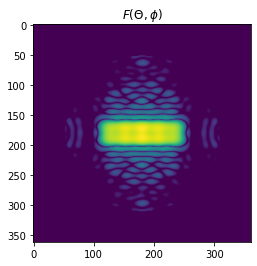

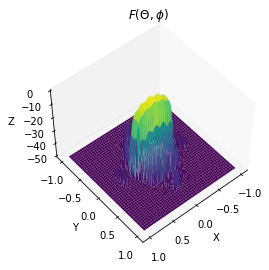

In [17]:
np.savetxt('Results/Data/Data_F_' + boundary + '.txt', Z)

fig = plt.figure(1)
plt.imshow(Z) 
plt.title('$F(\Theta, \phi)$')
plt.savefig('Results/Images/Horizontal_F_' + boundary + '.png', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
X_plot, Y_plot = np.meshgrid(x, x)
ax.plot_surface(X_plot, Y_plot, Z, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(limit, 0)
plt.title('$F(\Theta, \phi)$')
plt.savefig('Results/Images/3D_F_' + boundary + '.png', dpi = 300)
ax.view_init(50, 50)

In [ ]:
rho = np.sqrt(X_plot**2 + Y_plot**2) * a
beta = np.arctan2(Y_plot, X_plot)

rho = np.reshape(rho, (len_x*len_x))
beta = np.reshape(beta, (len_x*len_x))

Z = np.zeros((len_x*len_x))

for i in tqdm(range(len_x * len_x)):
    Z[i] = np.abs(K_rho_beta(rho[i], beta[i]))

Z = np.reshape(Z, (len_x, len_x))
np.savetxt('Results/Data/Data_K_' + boundary + '.txt', Z)

 68%|███████████████████████▋           | 88349/130321 [02:39<01:15, 556.66it/s]

In [ ]:
fig = plt.figure(1)
plt.imshow(Z)
plt.title(r'$K(\rho, \beta)$')
plt.savefig('Results/Images/Horizontal_K_' + boundary + '.png', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, Z, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
plt.title(r'$K(\rho, \beta)$')
plt.savefig('Results/Images/3D_K_' + boundary + '.png', dpi = 300)
ax.view_init(50, 50)

## Ratio de rango dinámico

In [ ]:
def dynamic_range_ratio(array):
    array = np.abs(array)
    return np.max(array) / np.min(array)

print('O rango dinámico é de: ', dynamic_range_ratio(I_mn))

In [ ]:
os.remove('Temporal_radial_vector.txt')
print('Total execution time is:', np.round(time.perf_counter() - t0, 2), 's')